In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

common_path_cpo = '../../results/test/'
common_path_ppo = '../../results/ppo/'

def generate_combined_visualizations(columns, csv_files_cpo, csv_files_ppo):
    avg_df_cpo = pd.DataFrame()
    max_df_cpo = pd.DataFrame()
    min_df_cpo = pd.DataFrame()
    
    avg_df_ppo = pd.DataFrame()
    max_df_ppo = pd.DataFrame()
    min_df_ppo = pd.DataFrame()

    # Process CPO algorithm data
    for file in csv_files_cpo:
        df = pd.read_csv(file)
        if avg_df_cpo.empty:
            avg_df_cpo['epi'] = df['epi']
            max_df_cpo['epi'] = df['epi']
            min_df_cpo['epi'] = df['epi']
        
        for attribute in columns:
            if attribute in avg_df_cpo:
                avg_df_cpo[attribute] += df[attribute]
                max_df_cpo[attribute] = max_df_cpo[attribute].combine(df[attribute], max)
                min_df_cpo[attribute] = min_df_cpo[attribute].combine(df[attribute], min)
            else:
                avg_df_cpo[attribute] = df[attribute]
                max_df_cpo[attribute] = df[attribute]
                min_df_cpo[attribute] = df[attribute]

    avg_df_cpo[columns] = avg_df_cpo[columns] / len(csv_files_cpo)

    # Process PPO algorithm data
    for file in csv_files_ppo:
        df = pd.read_csv(file)
        if avg_df_ppo.empty:
            avg_df_ppo['epi'] = df['epi']
            max_df_ppo['epi'] = df['epi']
            min_df_ppo['epi'] = df['epi']
        
        for attribute in columns:
            if attribute in avg_df_ppo:
                avg_df_ppo[attribute] += df[attribute]
                max_df_ppo[attribute] = max_df_ppo[attribute].combine(df[attribute], max)
                min_df_ppo[attribute] = min_df_ppo[attribute].combine(df[attribute], min)
            else:
                avg_df_ppo[attribute] = df[attribute]
                max_df_ppo[attribute] = df[attribute]
                min_df_ppo[attribute] = df[attribute]

    avg_df_ppo[columns] = avg_df_ppo[columns] / len(csv_files_ppo)

    for attribute in columns:
        plt.figure(figsize=(30, 10))
        
        # CPO Plot
        plt.plot(avg_df_cpo['epi'], avg_df_cpo[attribute], marker='o', linestyle='-', color='blue', label='CPO Average')
        plt.fill_between(avg_df_cpo['epi'], min_df_cpo[attribute], max_df_cpo[attribute], color='blue', alpha=0.2, label='CPO Min-Max Range')
        
        # PPO Plot
        plt.plot(avg_df_ppo['epi'], avg_df_ppo[attribute], marker='o', linestyle='-', color='red', label='PPO Average')
        plt.fill_between(avg_df_ppo['epi'], min_df_ppo[attribute], max_df_ppo[attribute], color='red', alpha=0.2, label='PPO Min-Max Range')
        
        plt.title(f'Average {attribute} Across Episodes for CPO and PPO', fontsize=24)
        plt.xlabel('epi', fontsize=18)
        plt.ylabel(attribute, fontsize=18)
        plt.grid(True)
        plt.legend()
        plt.show()

## Training Episode Summary

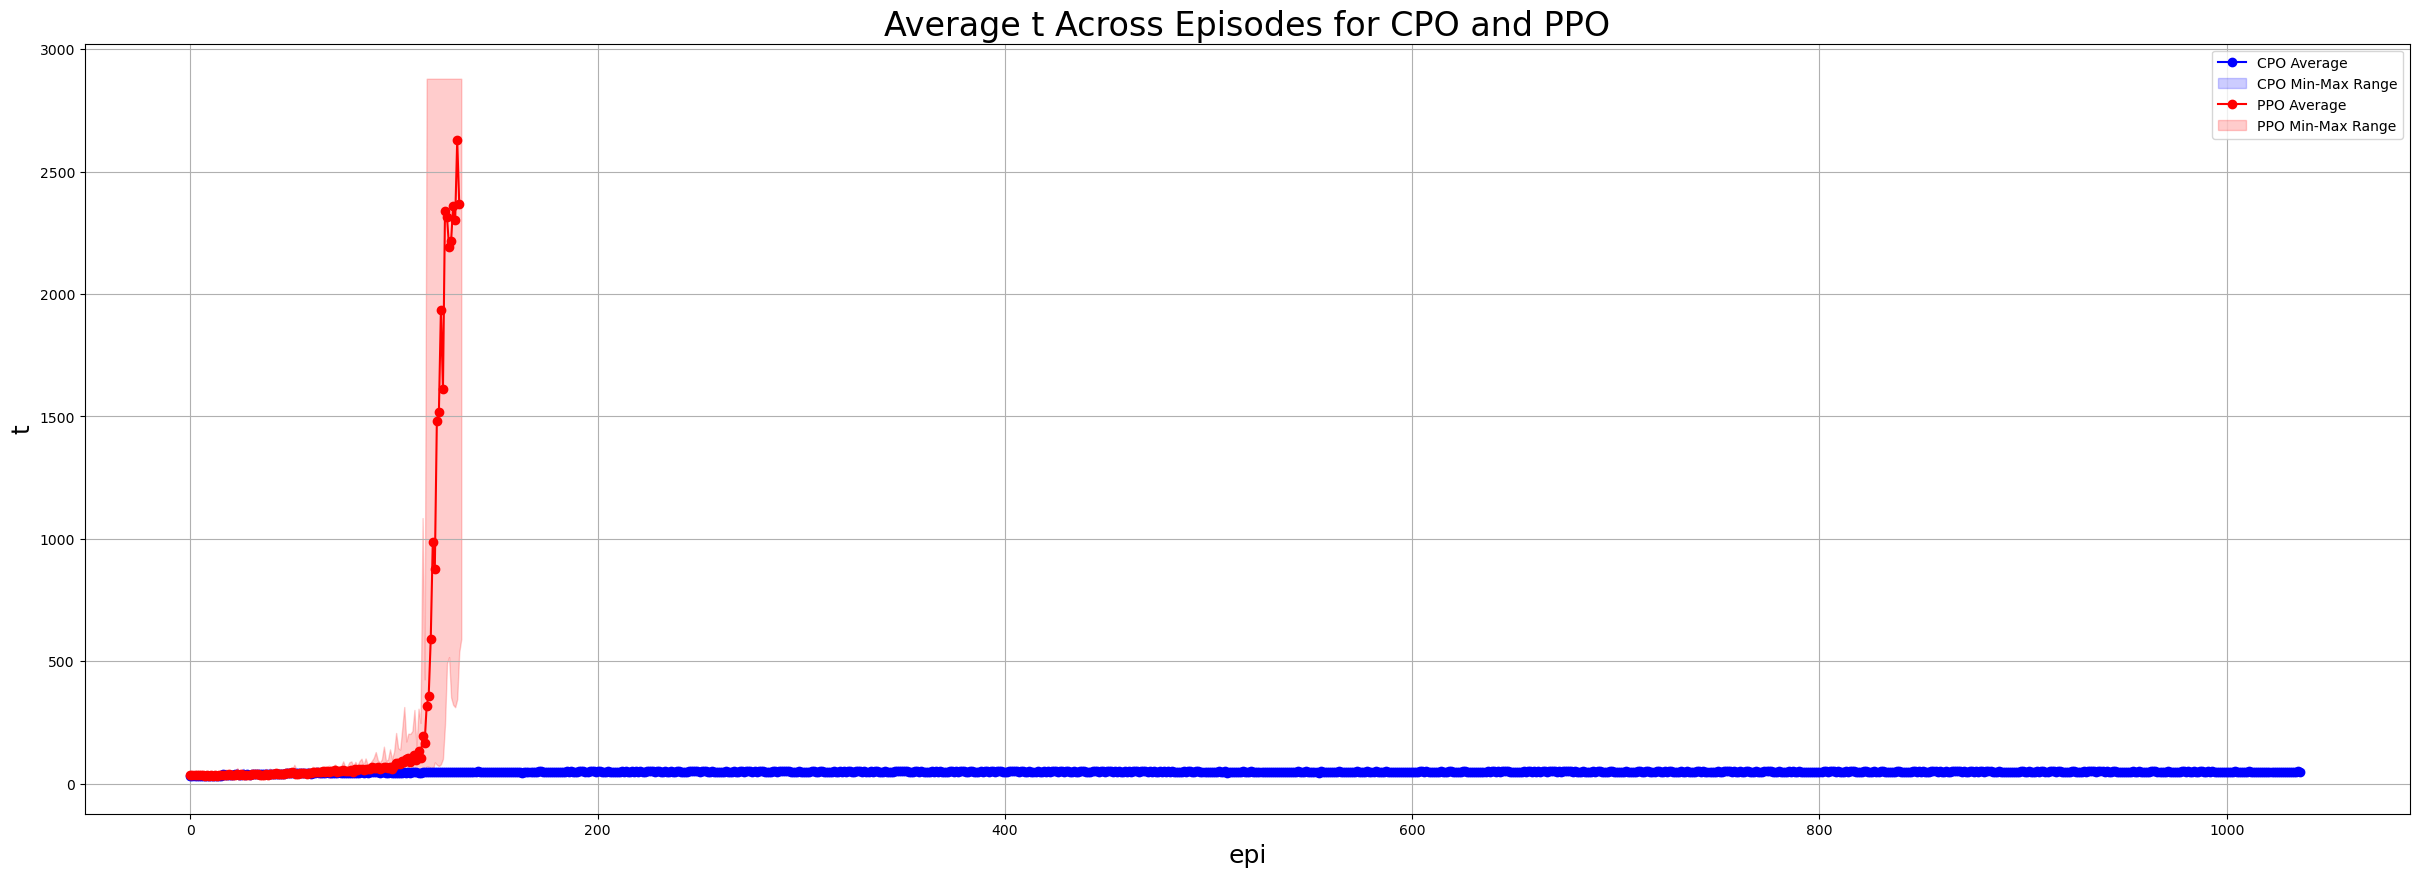

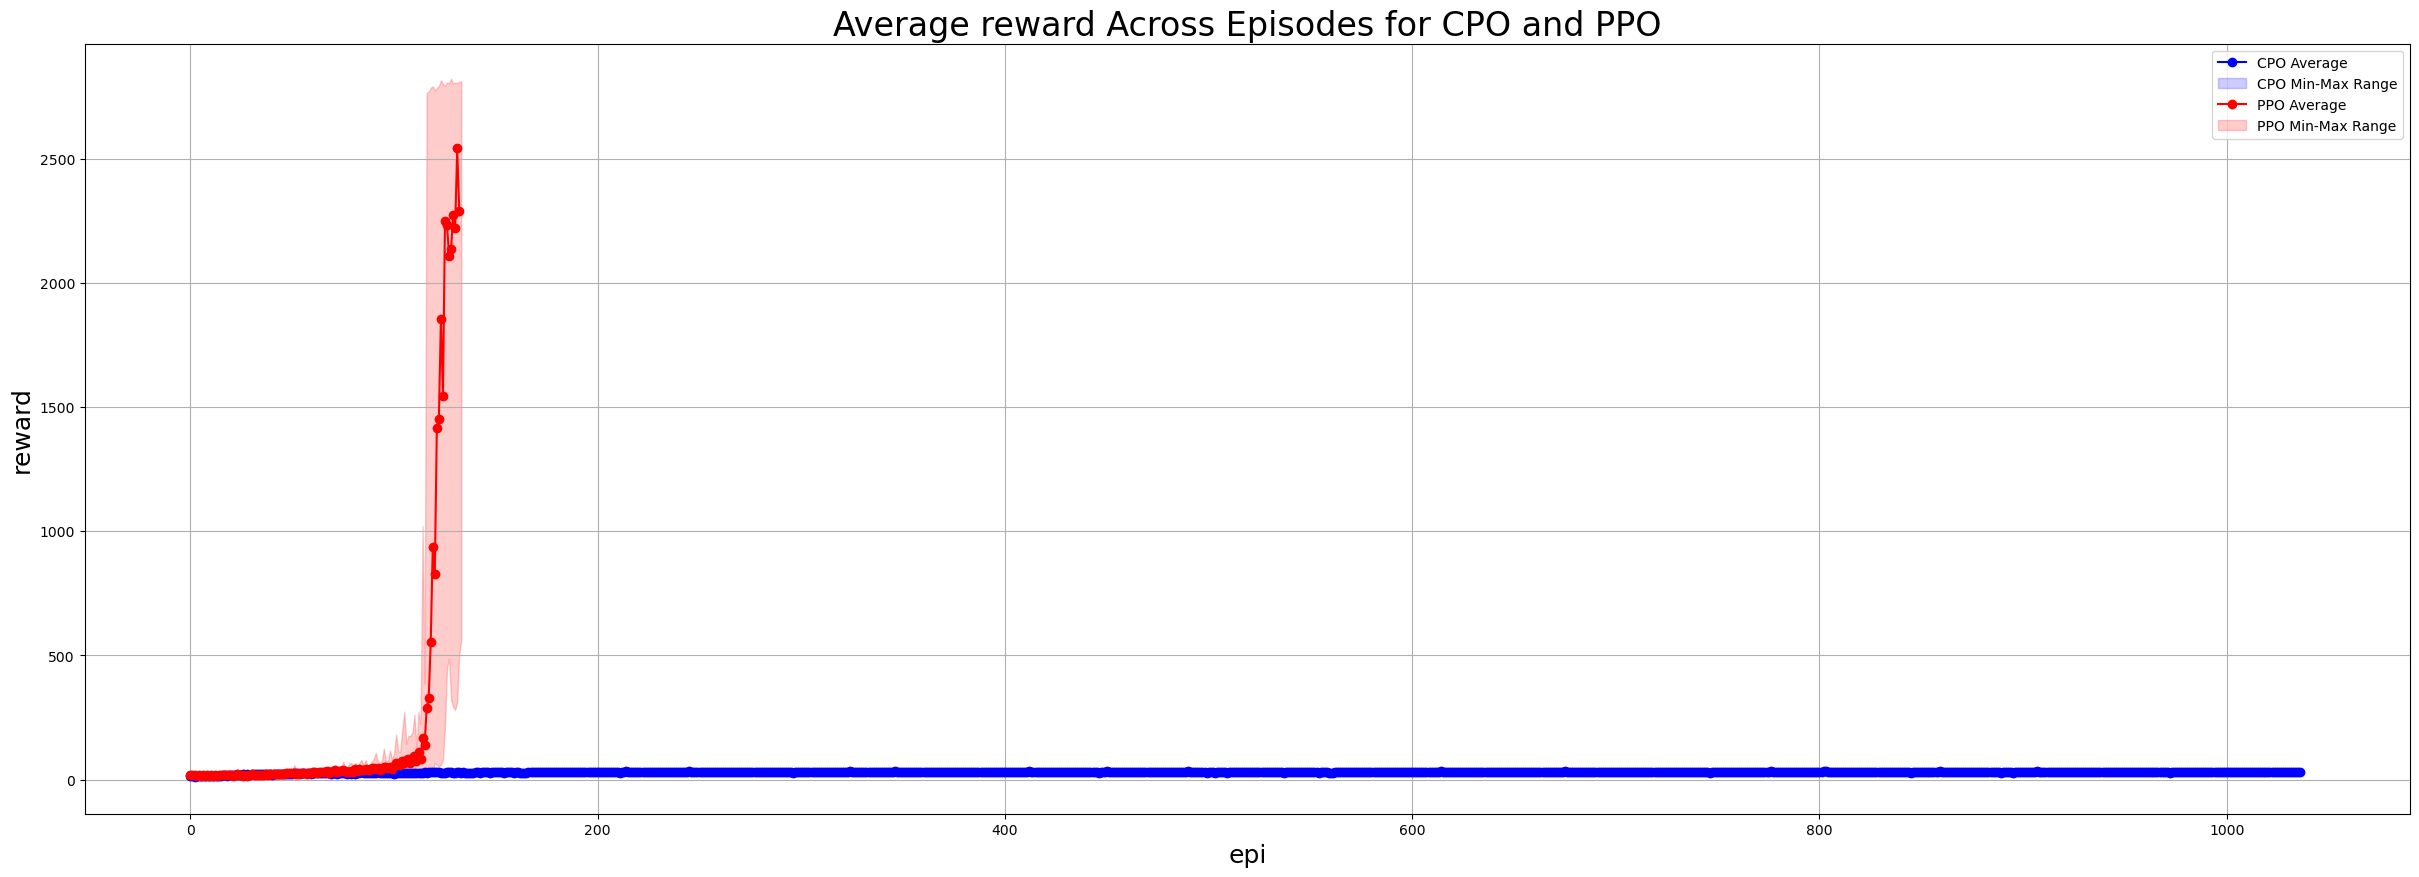

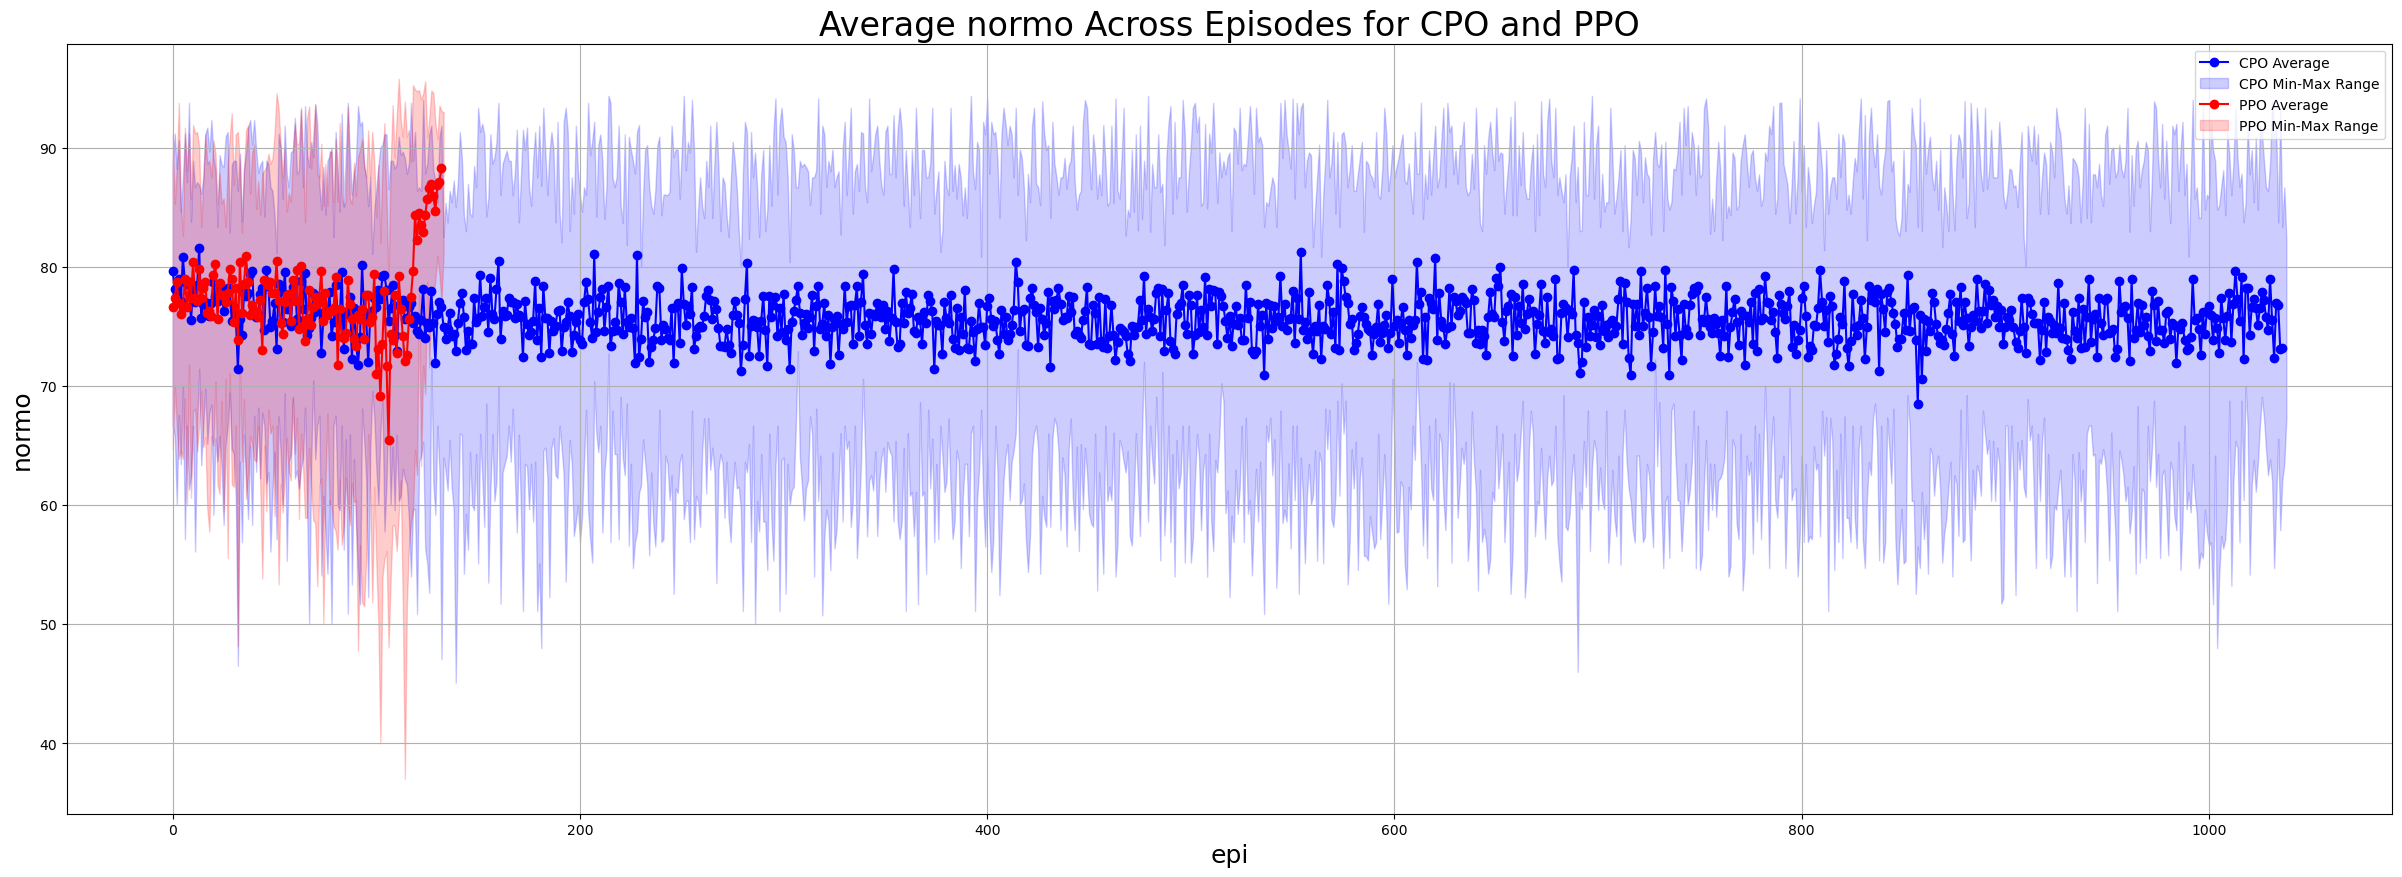

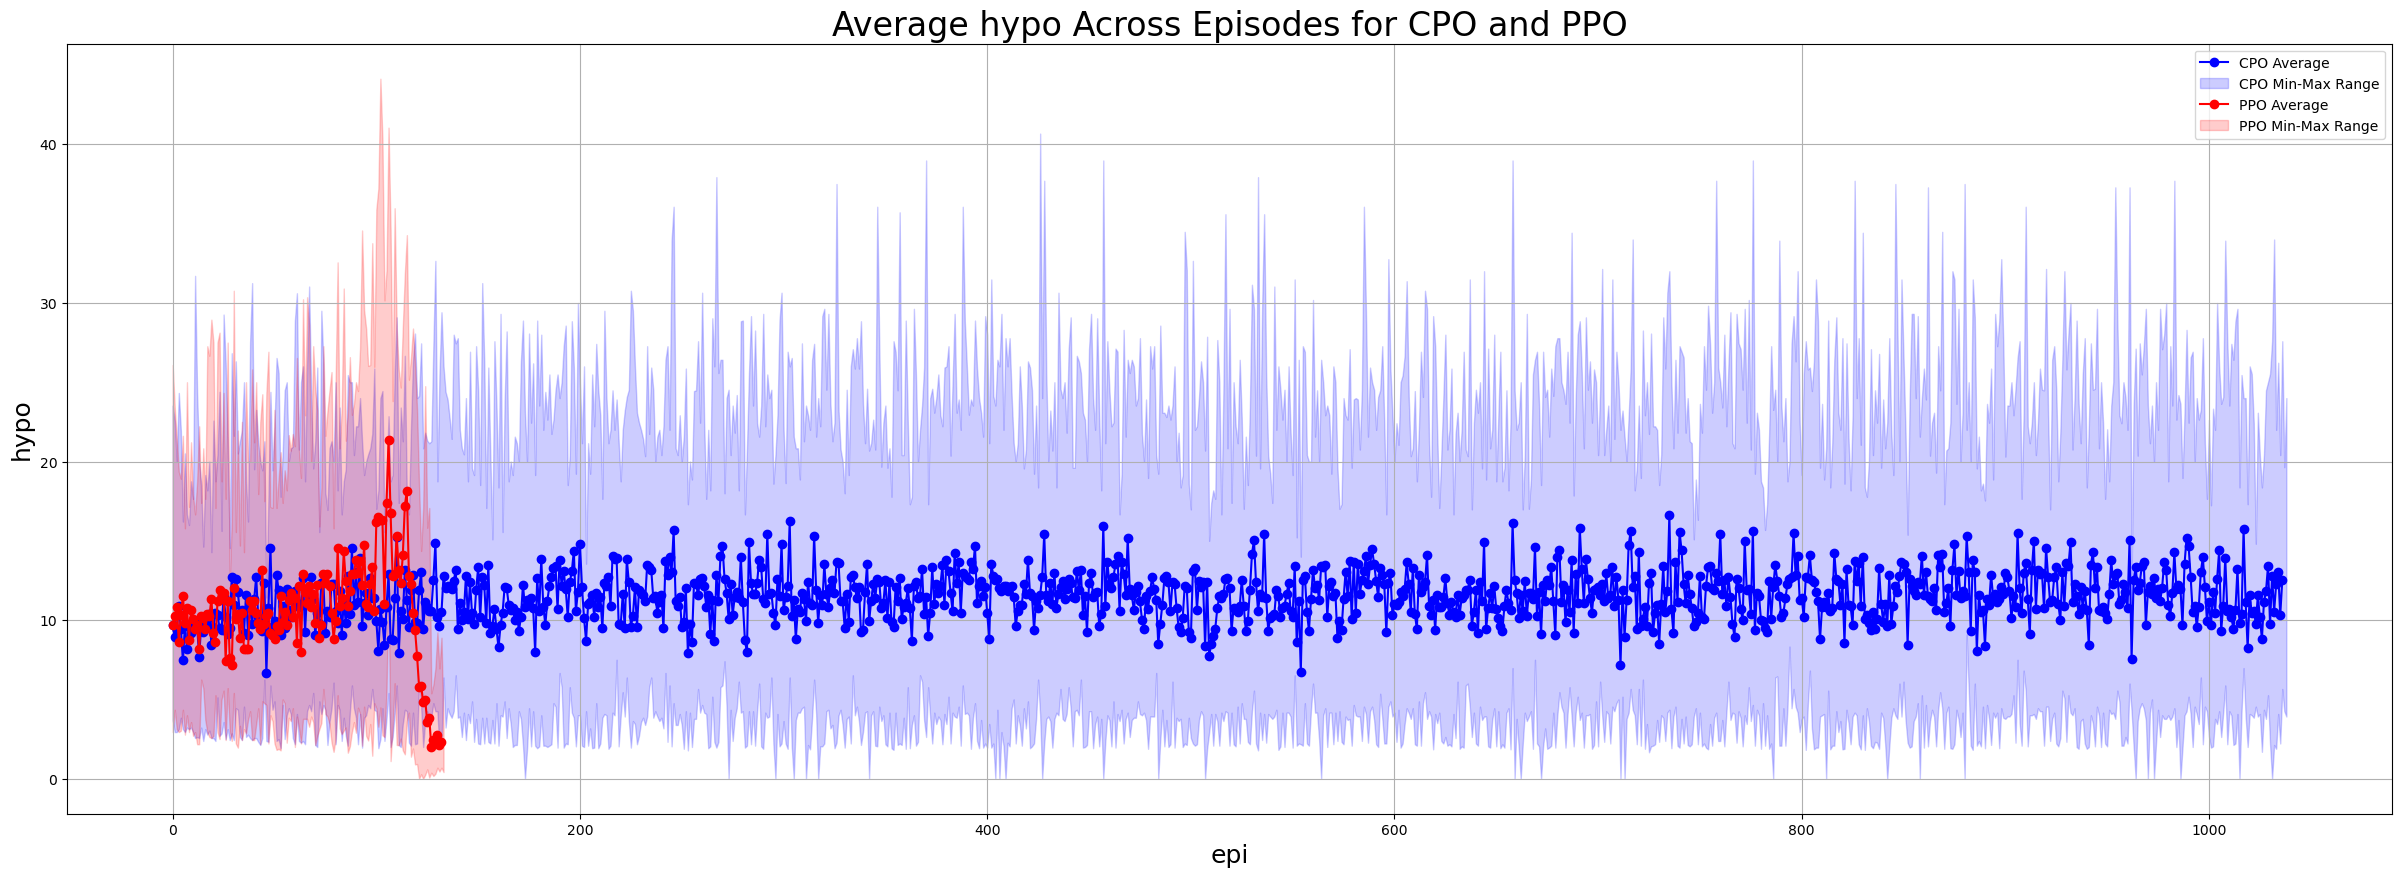

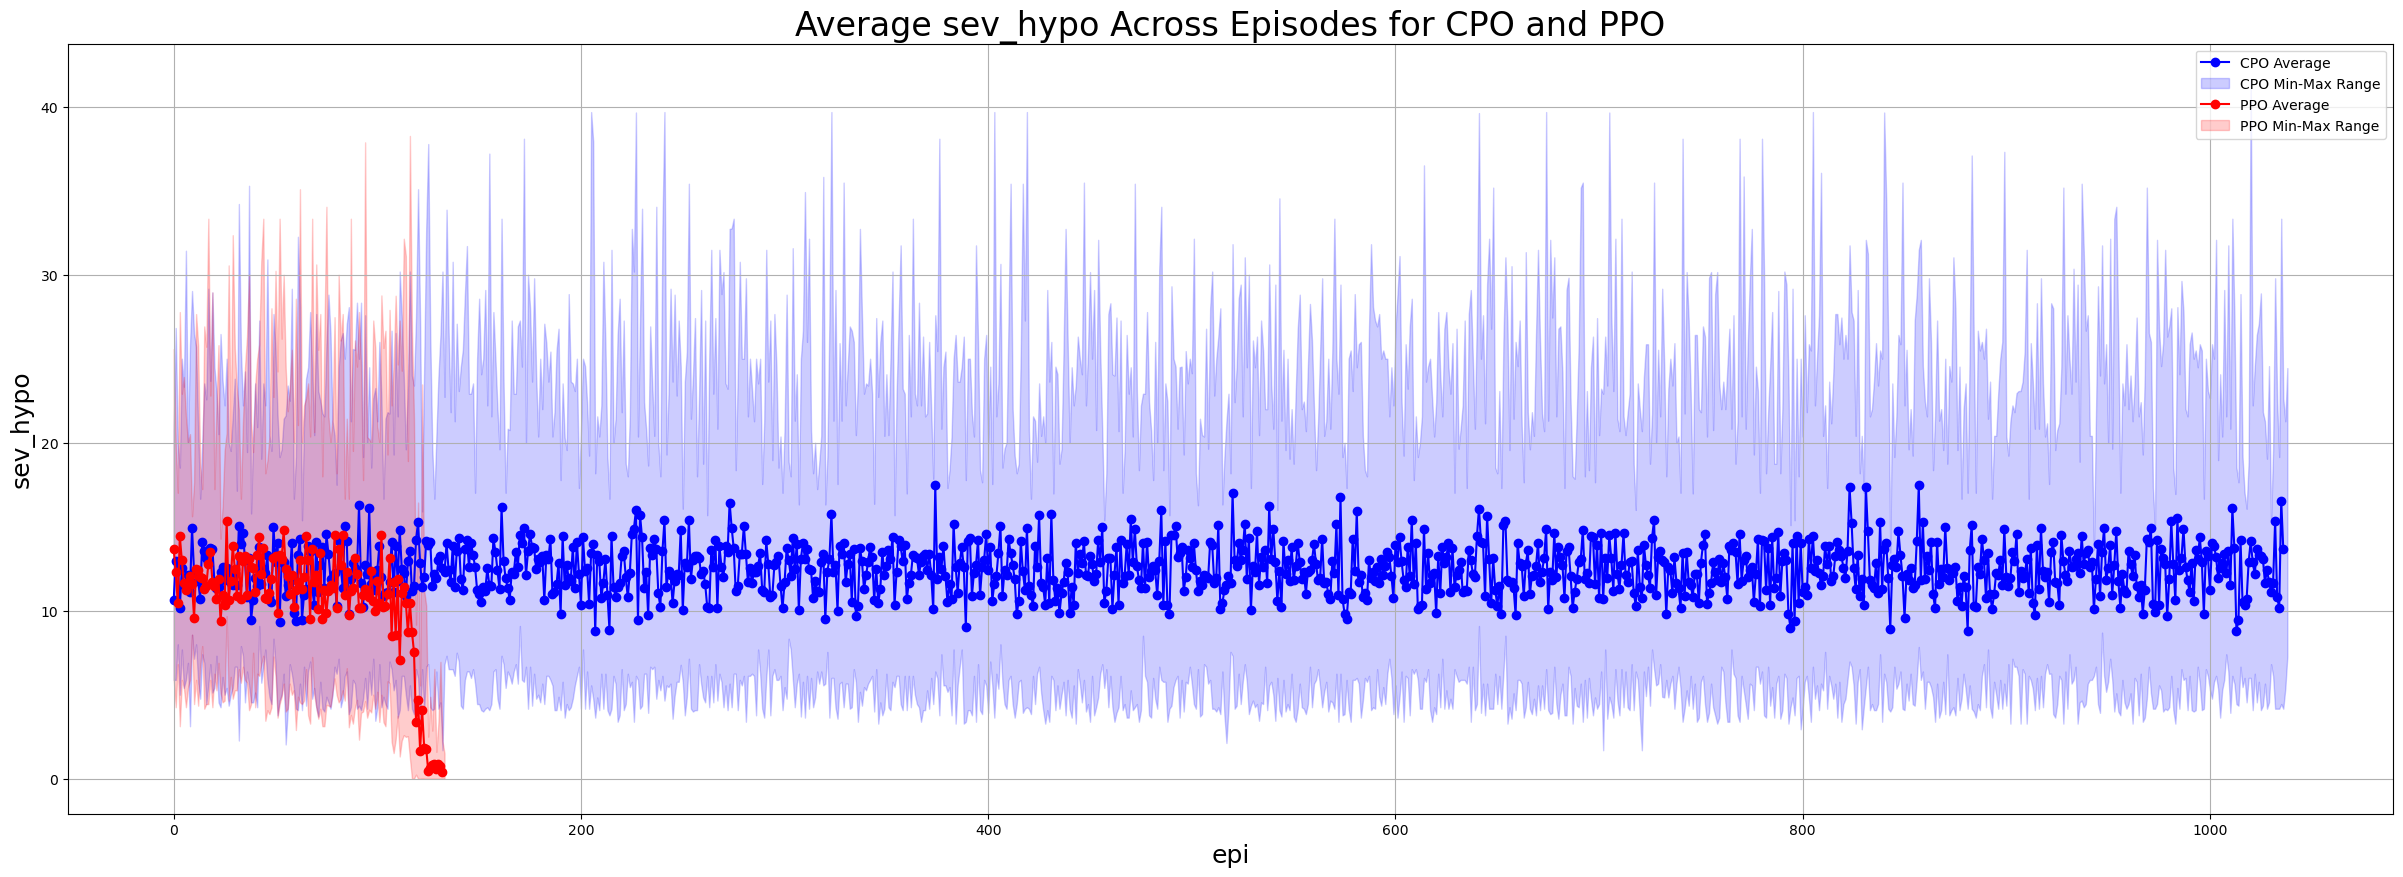

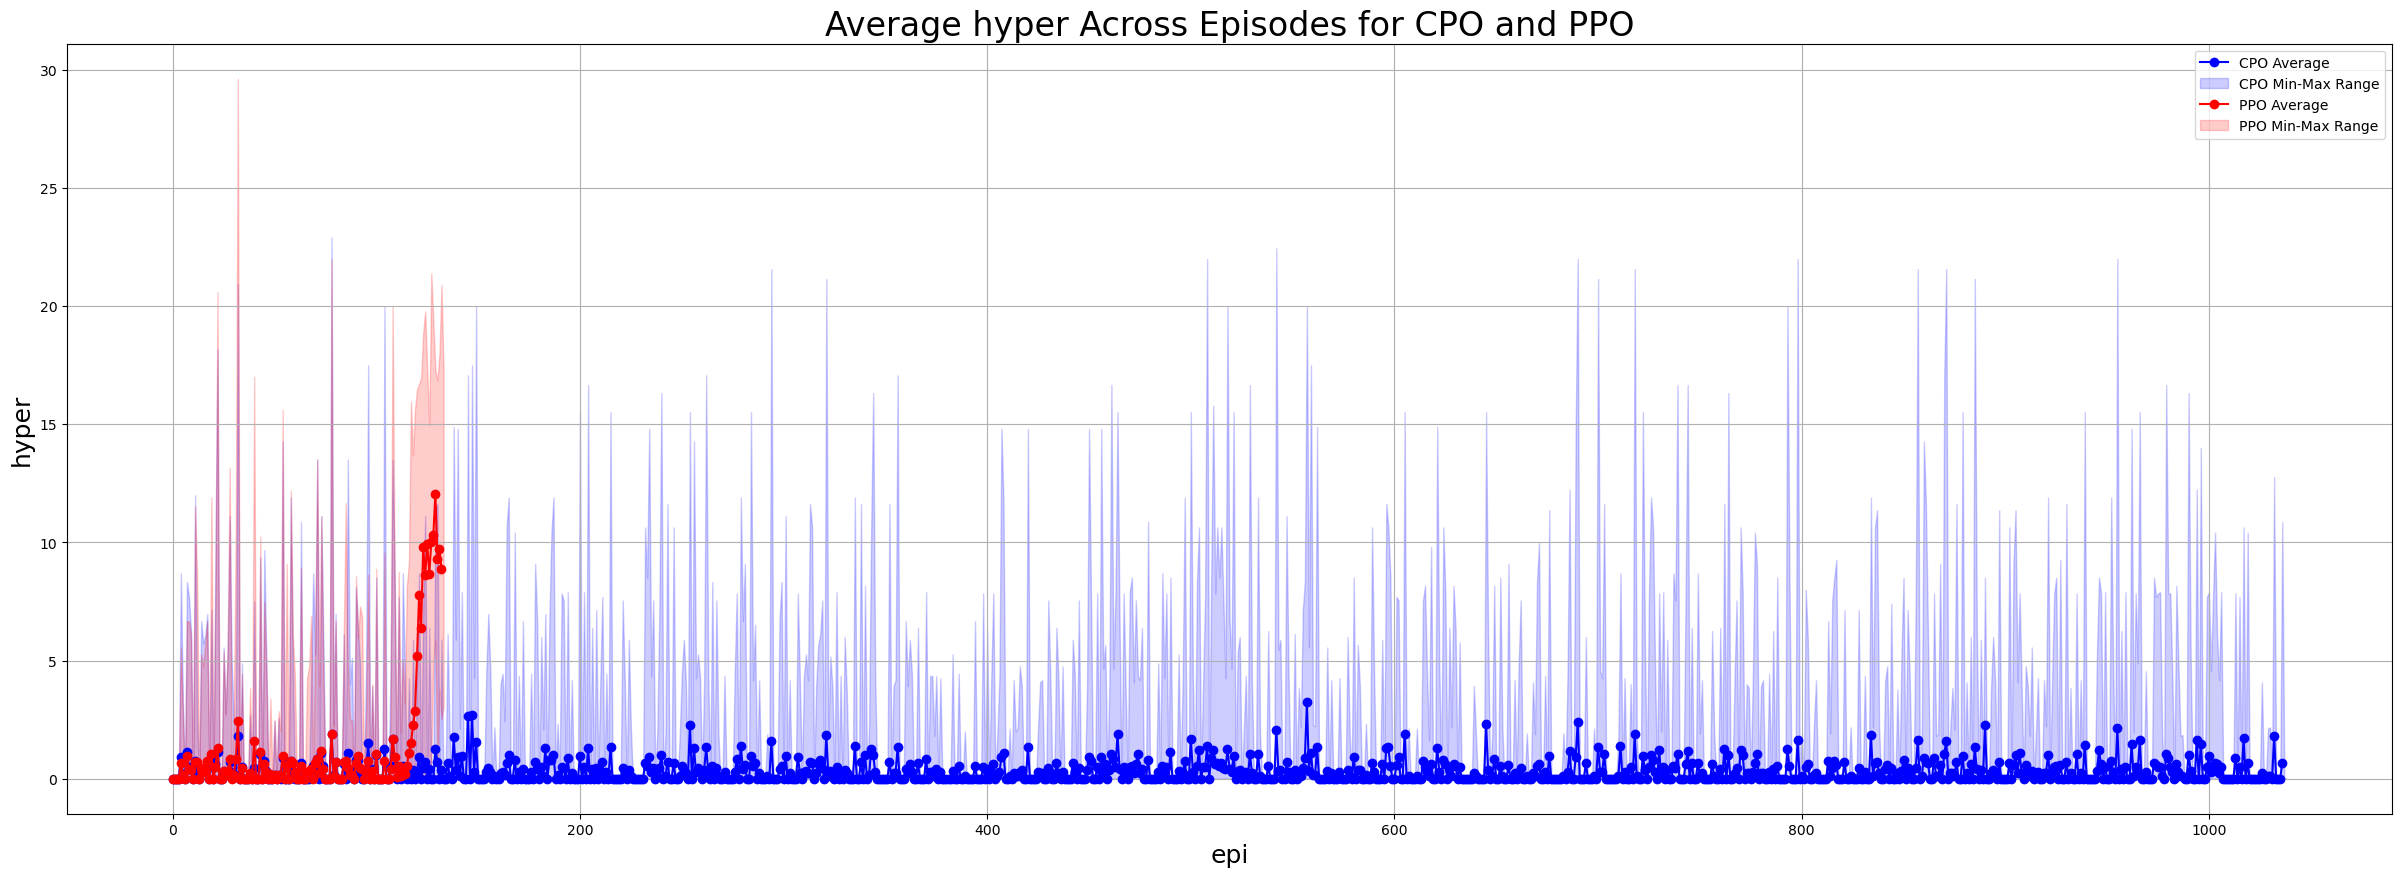

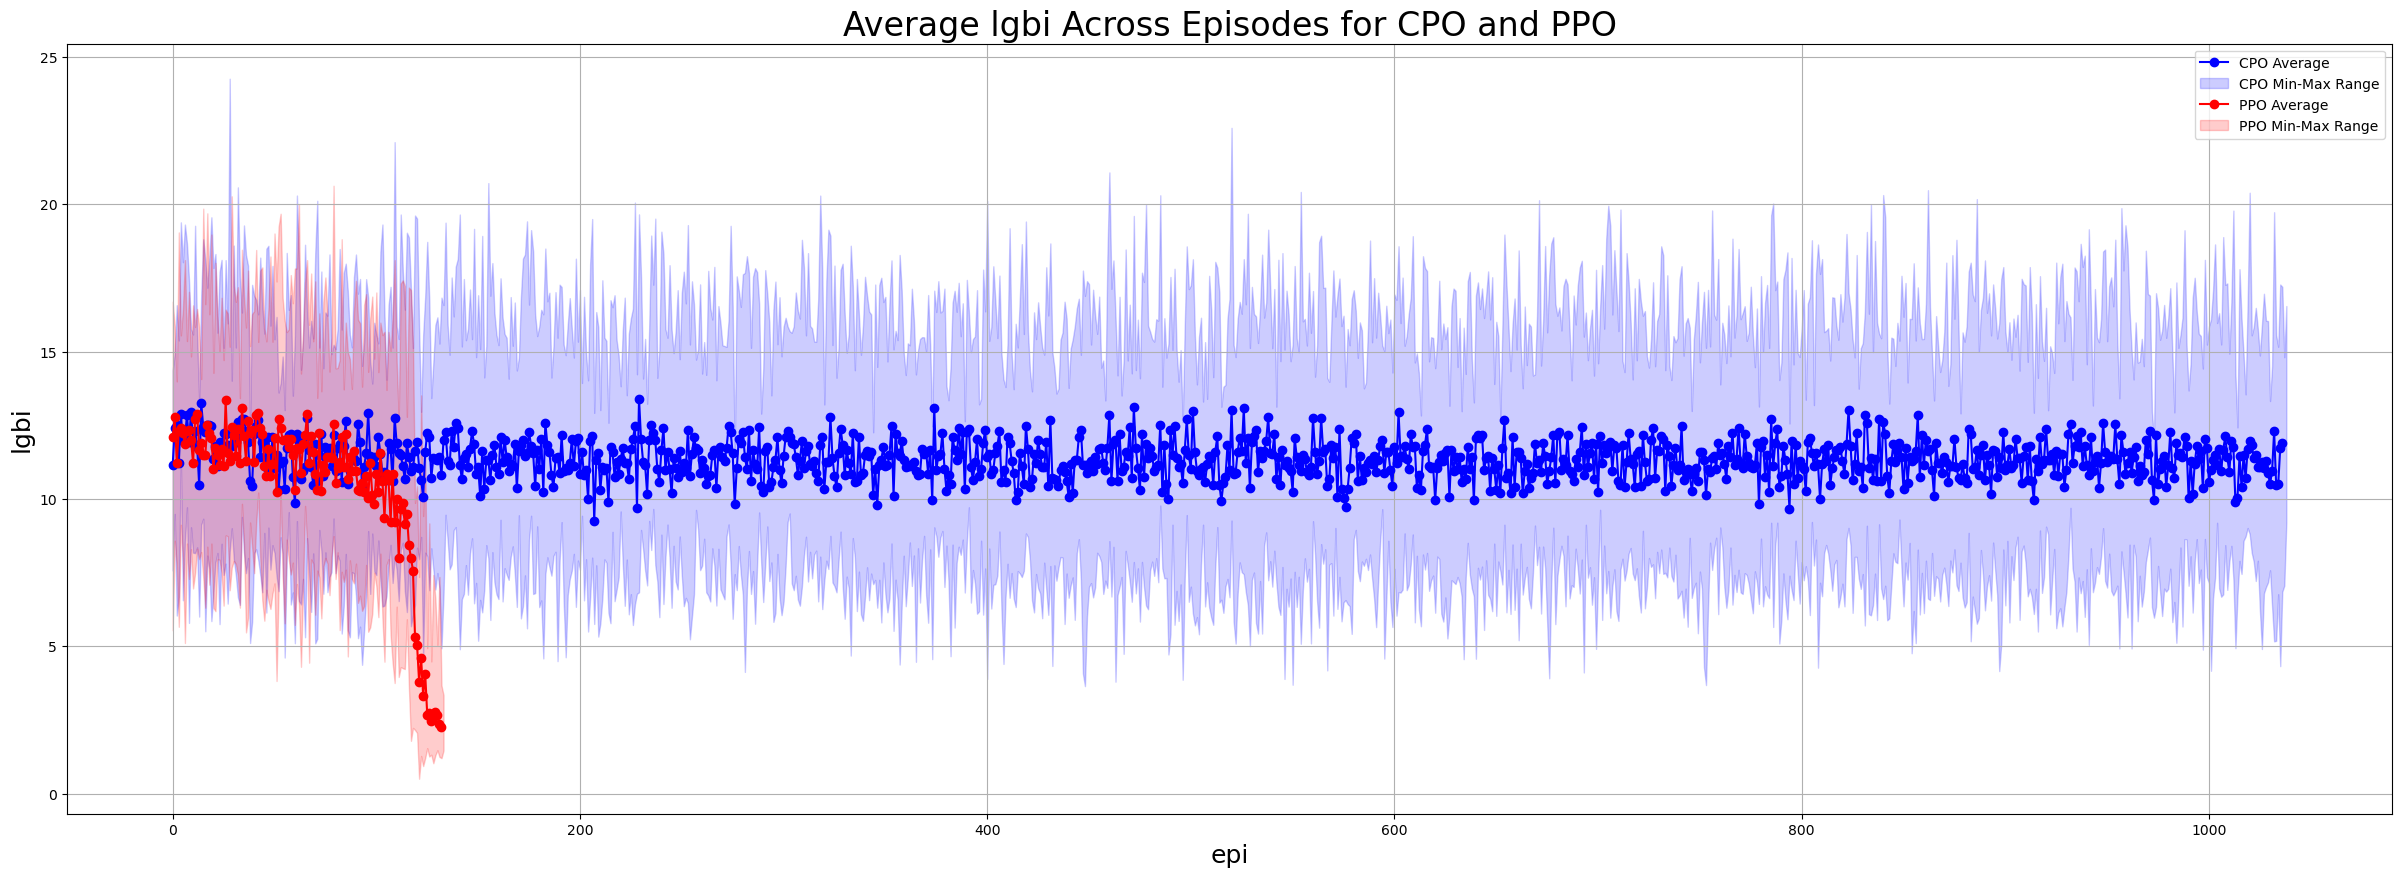

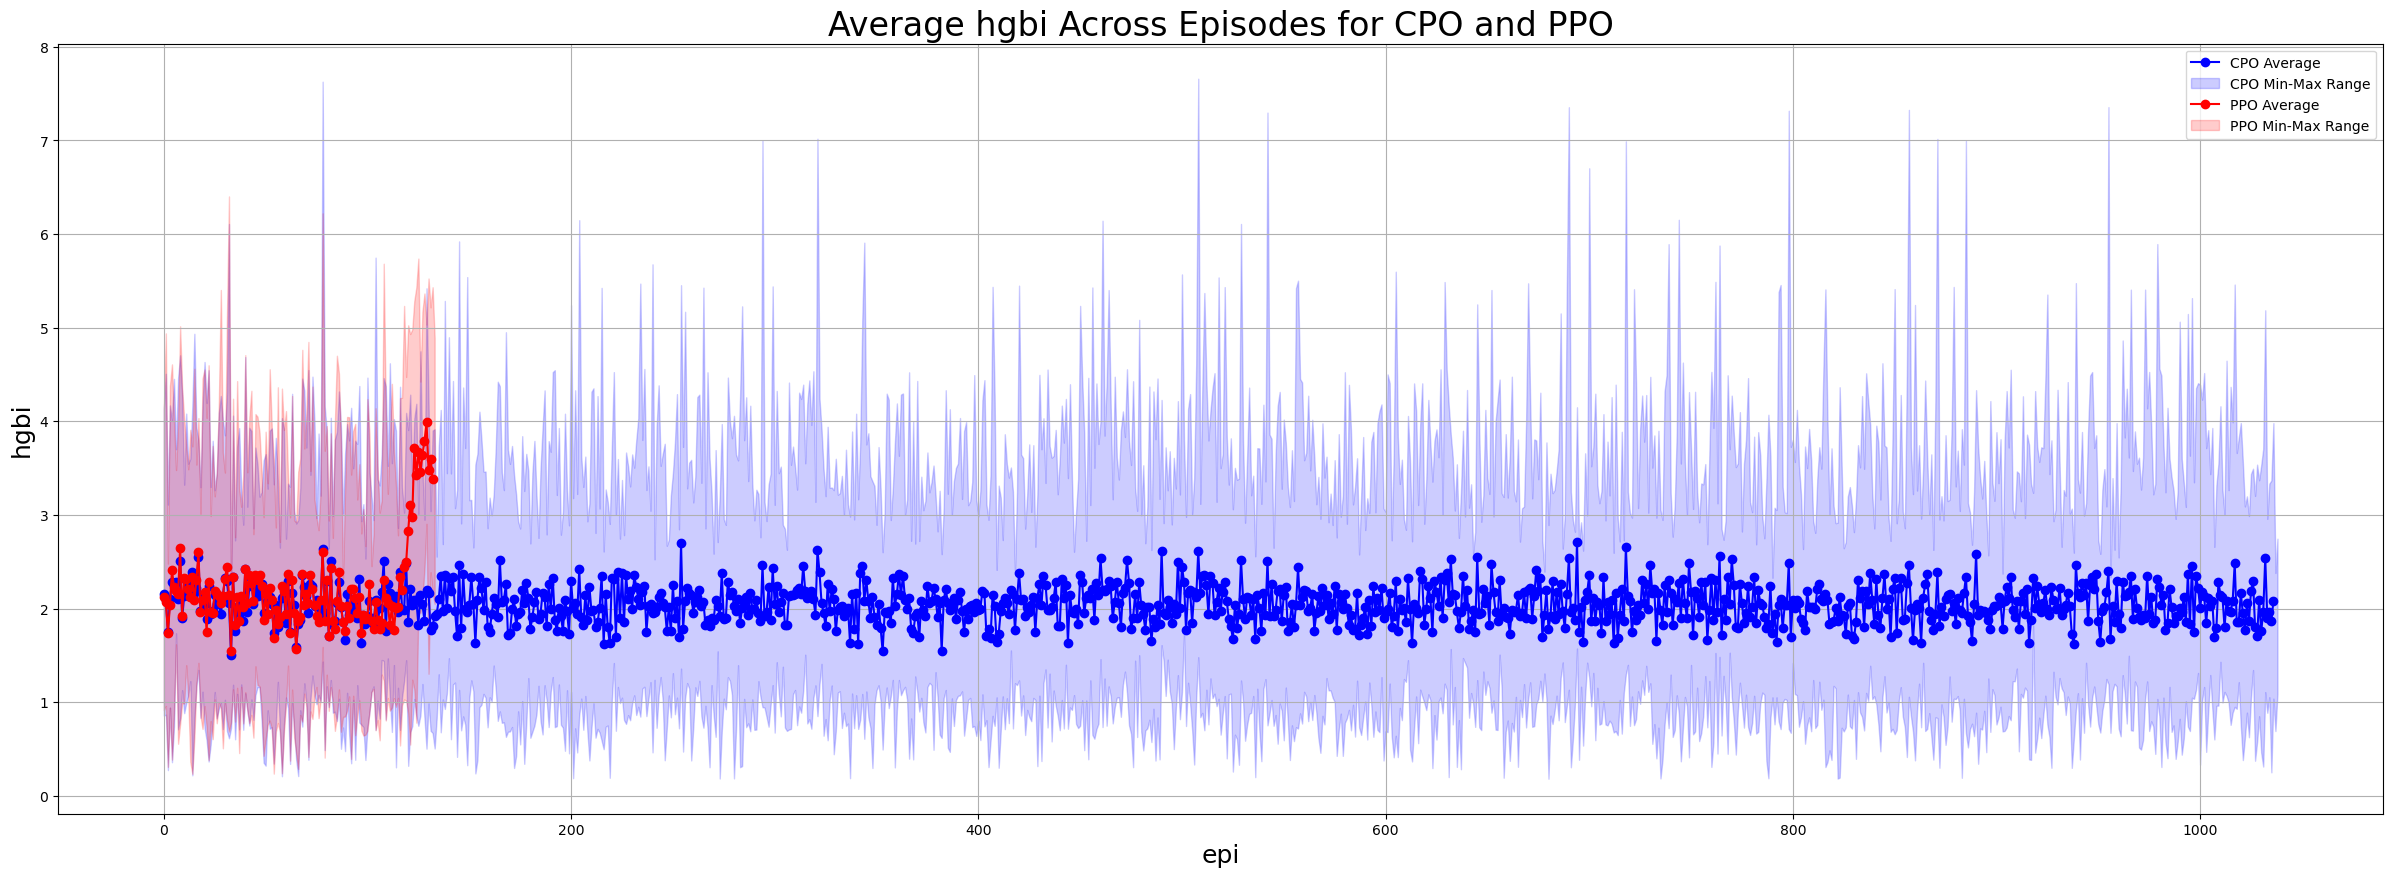

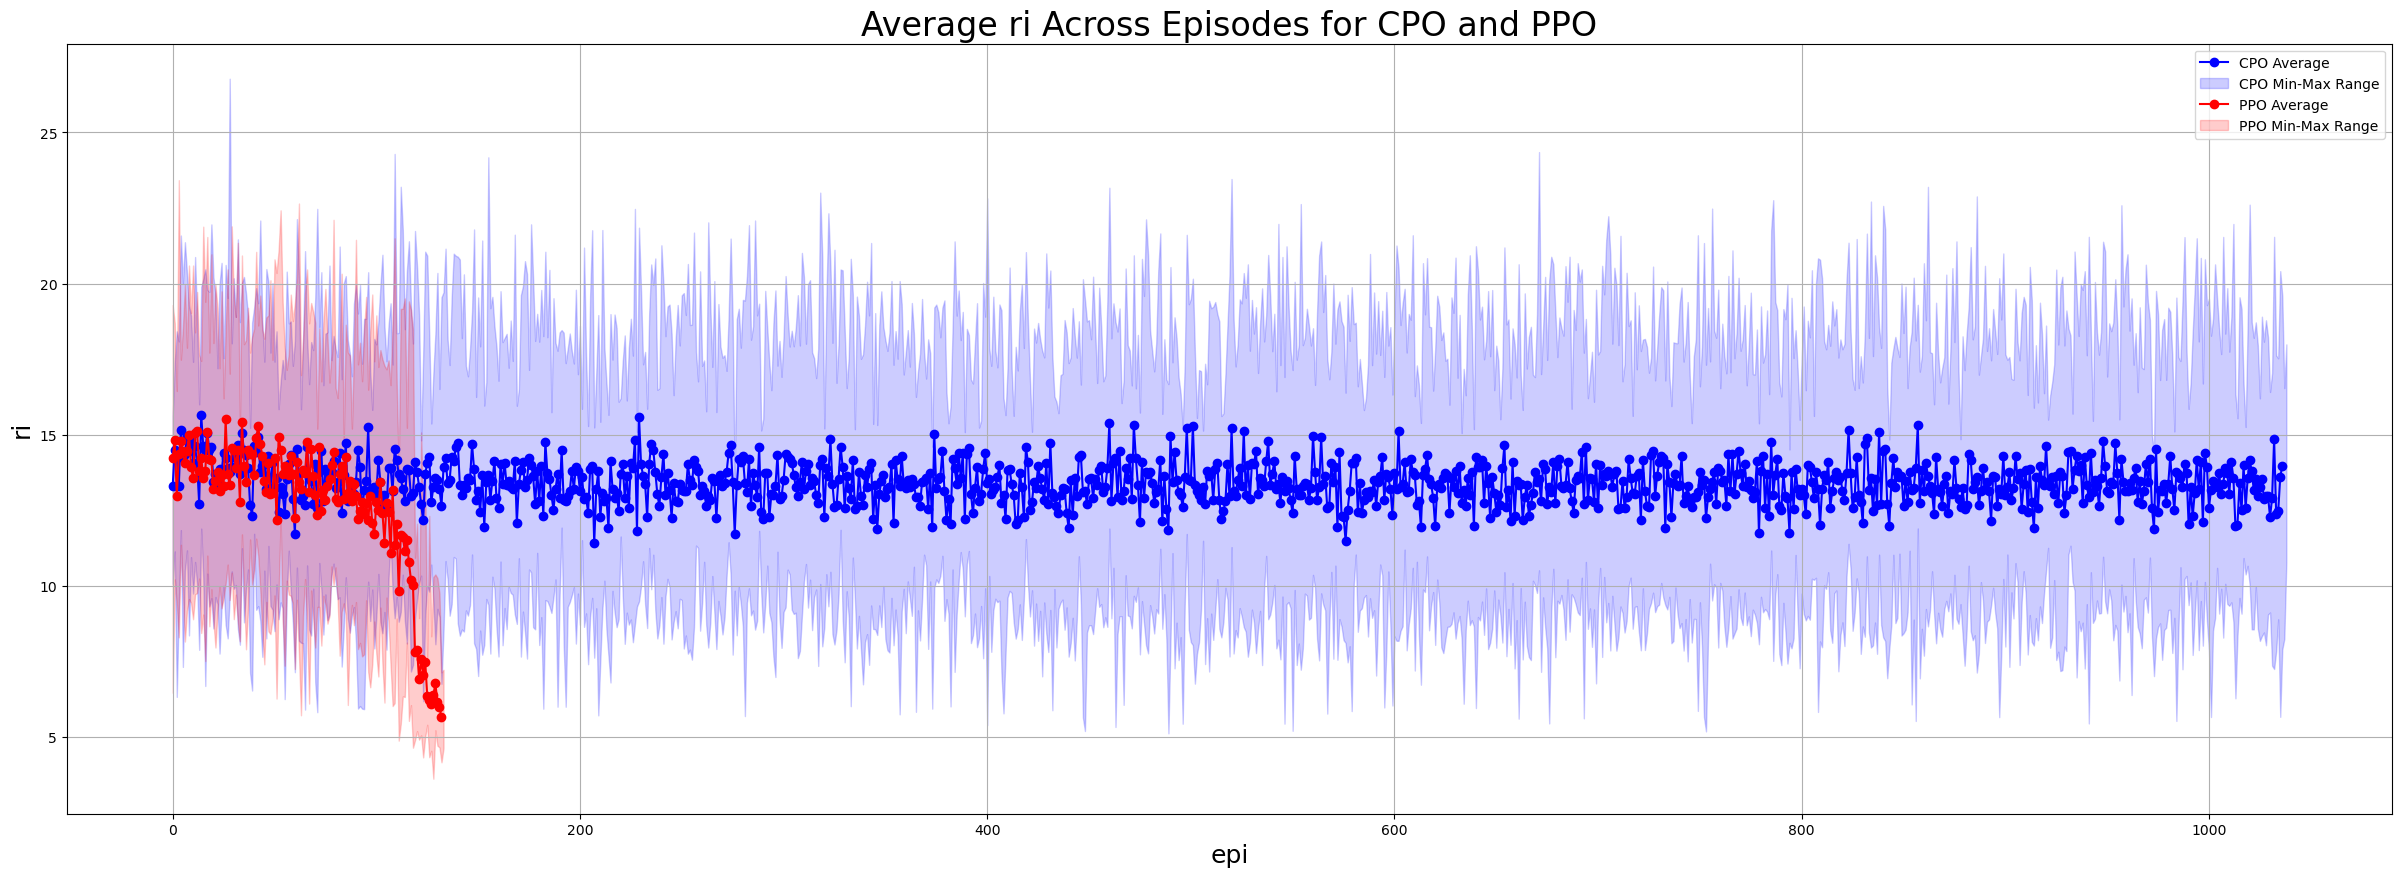

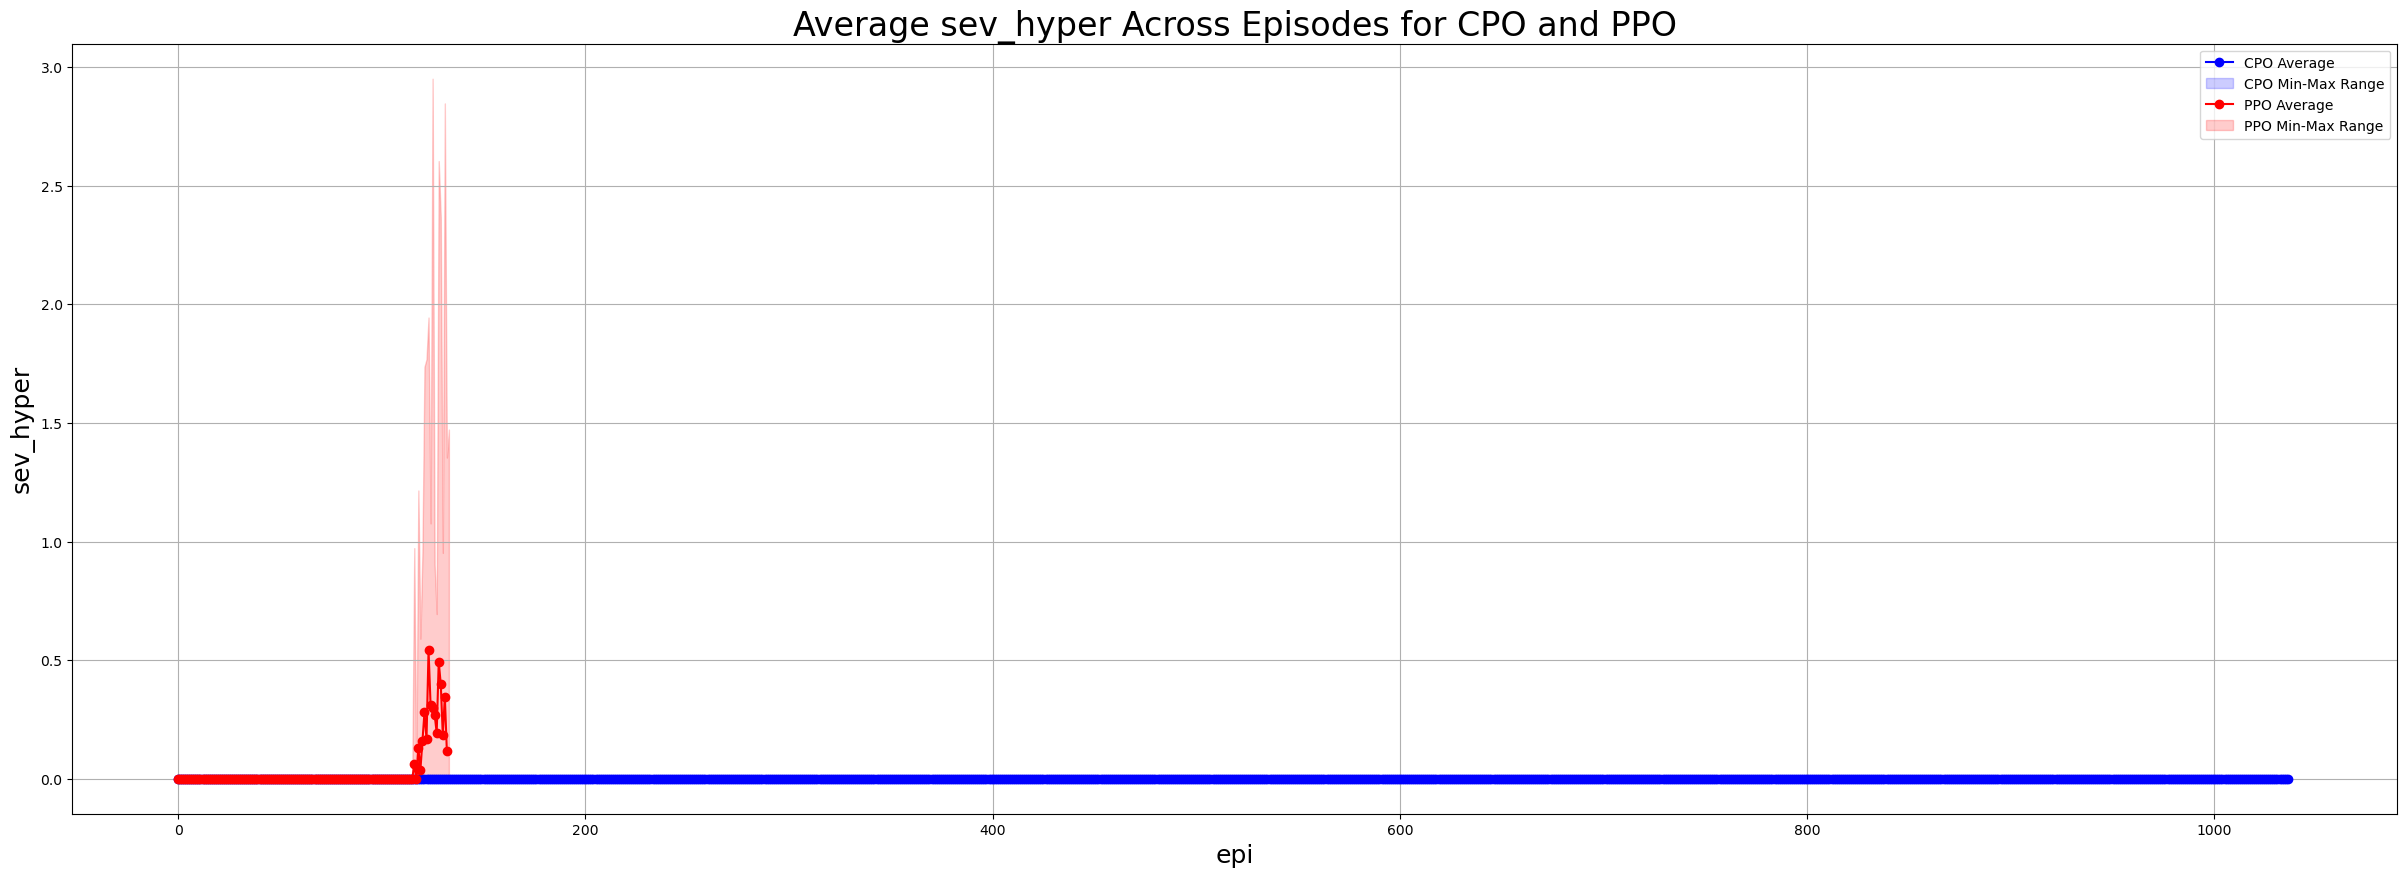

In [2]:
csv_file_path_cpo = common_path_cpo + 'training/data/'
csv_file_path_ppo = common_path_ppo + 'training/data/'

csv_files_cpo = glob.glob(csv_file_path_cpo + "training_episode_summary_*.csv")
csv_files_ppo = glob.glob(csv_file_path_ppo + "training_episode_summary_*.csv")

columns = [col for col in pd.read_csv(csv_files_cpo[0]).columns if col not in ['epi', 'aBGP_rmse', 'cBGP_rmse']]

generate_combined_visualizations(columns=columns, csv_files_cpo=csv_files_cpo, csv_files_ppo=csv_files_ppo)

## Testing Episode Summary

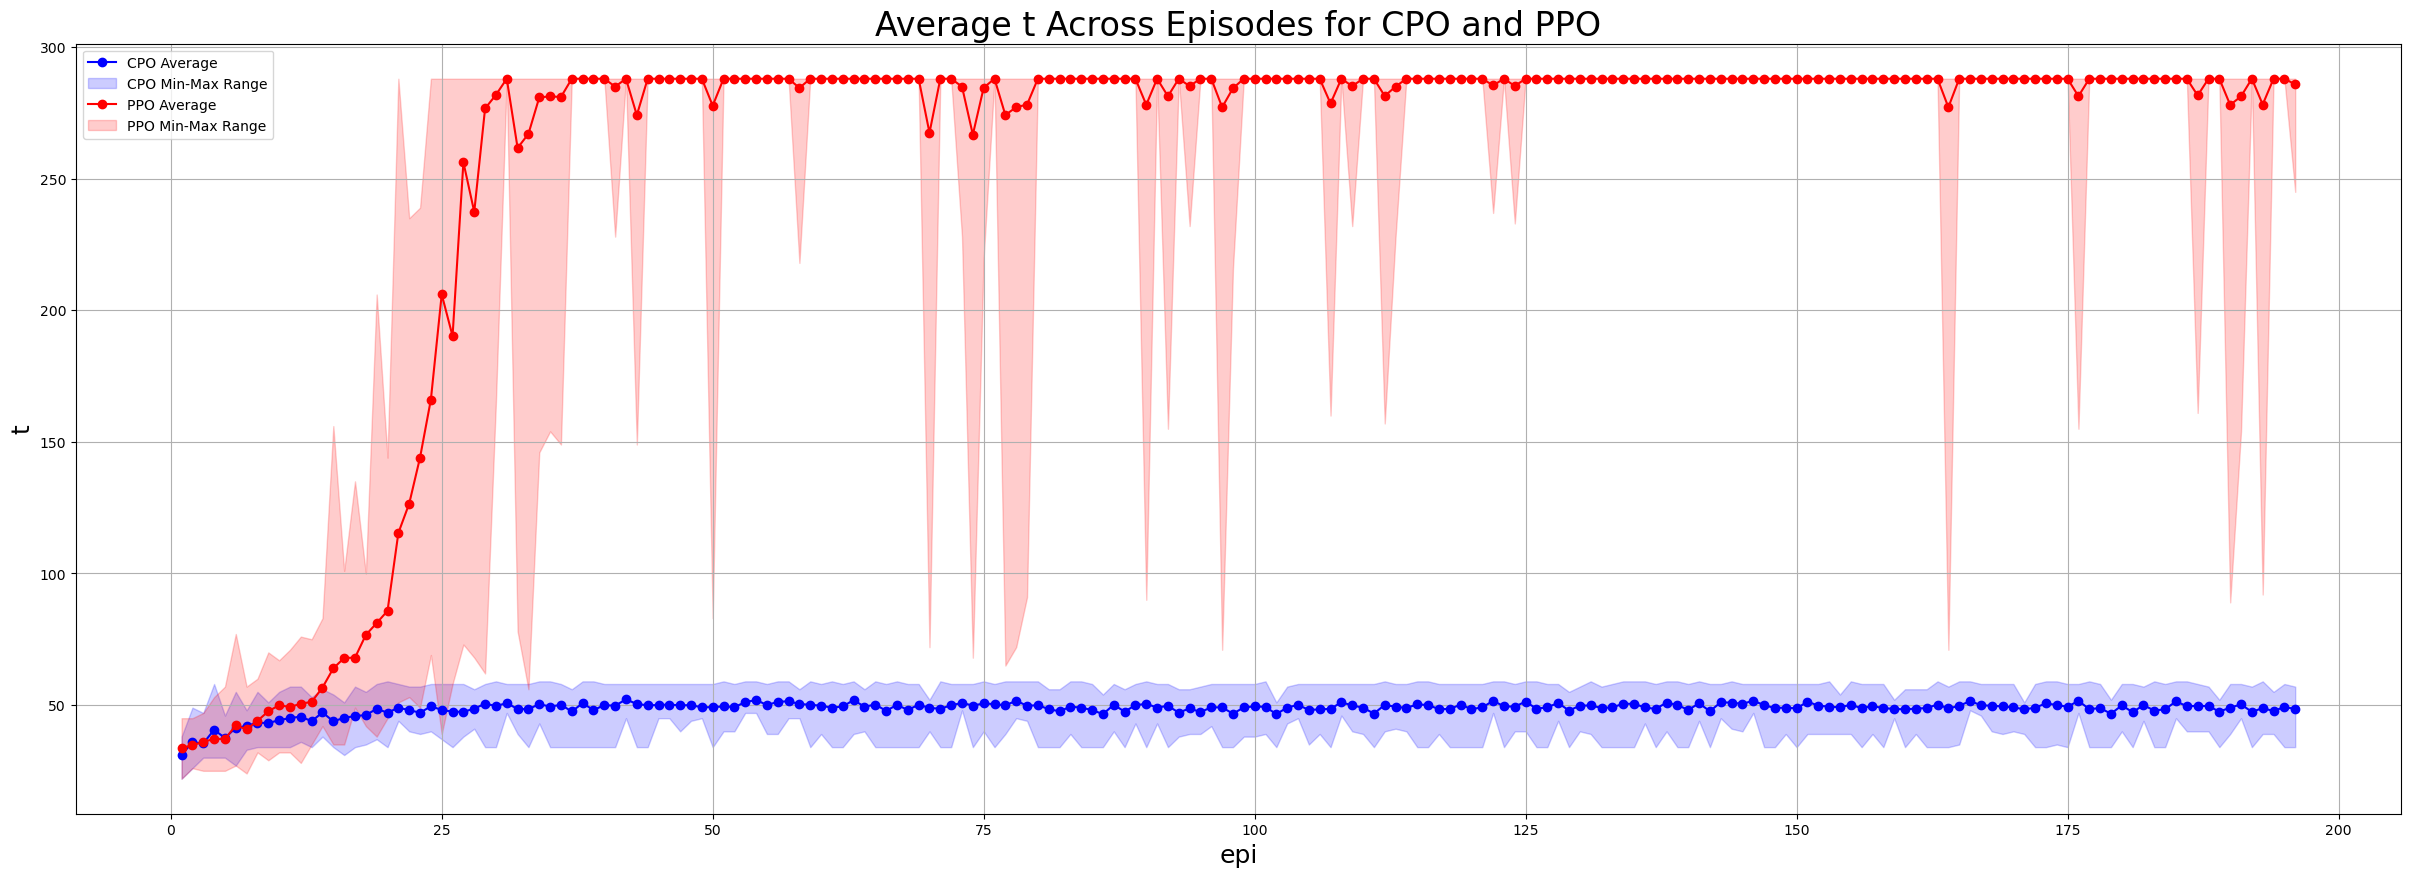

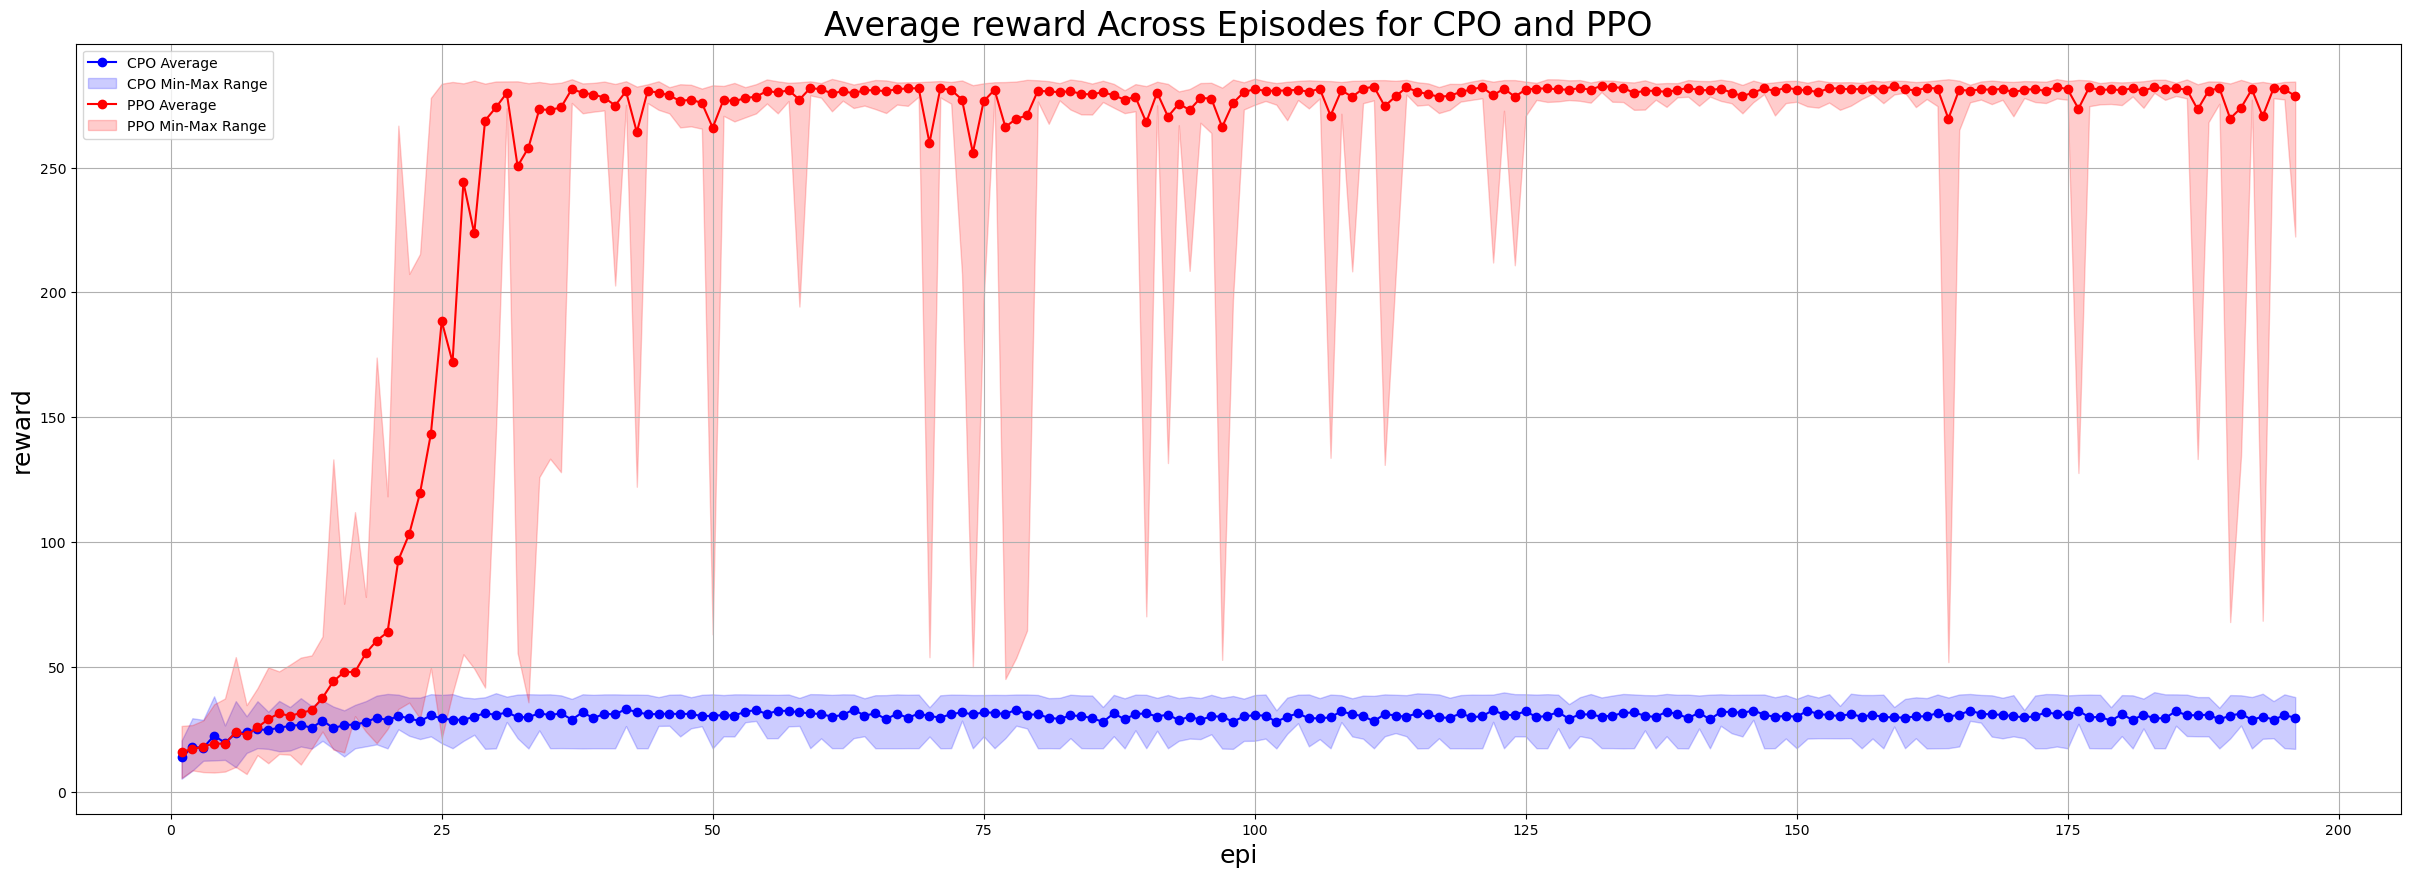

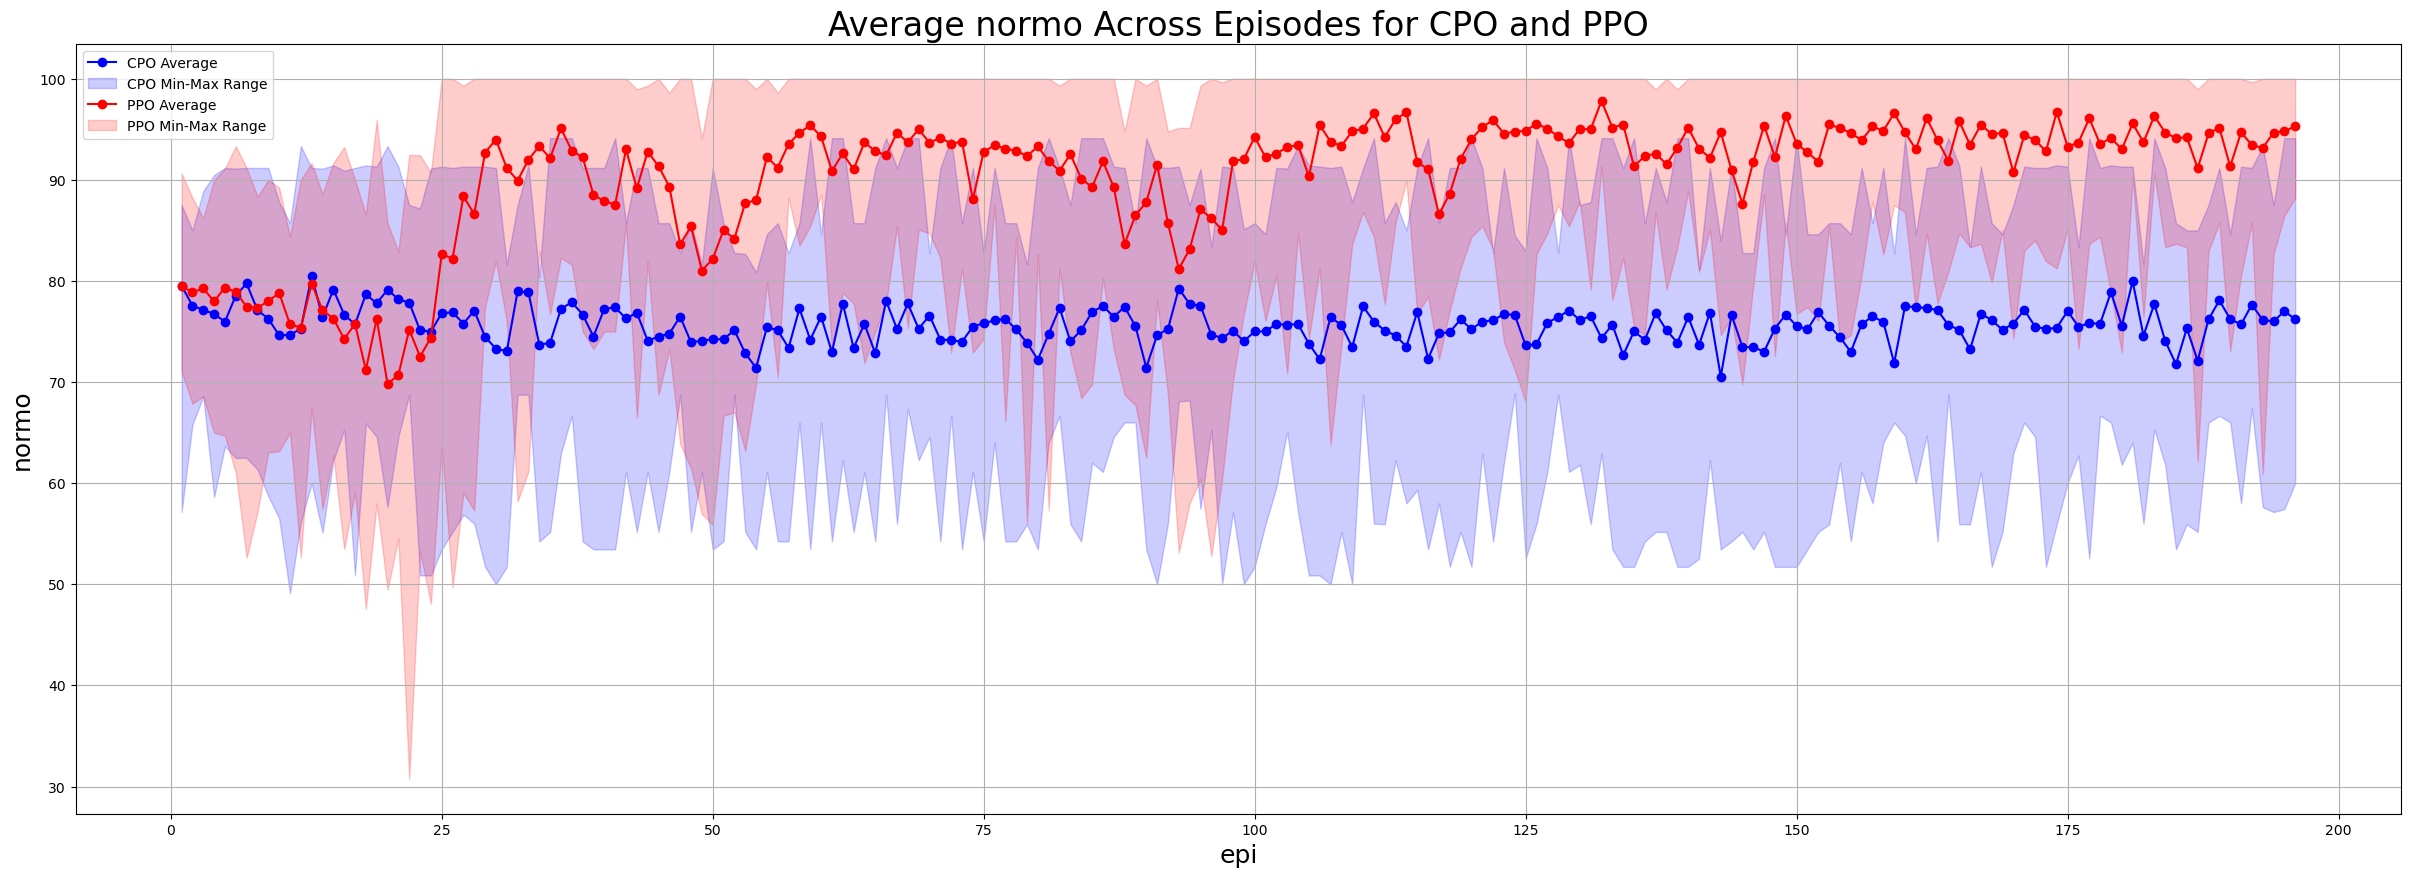

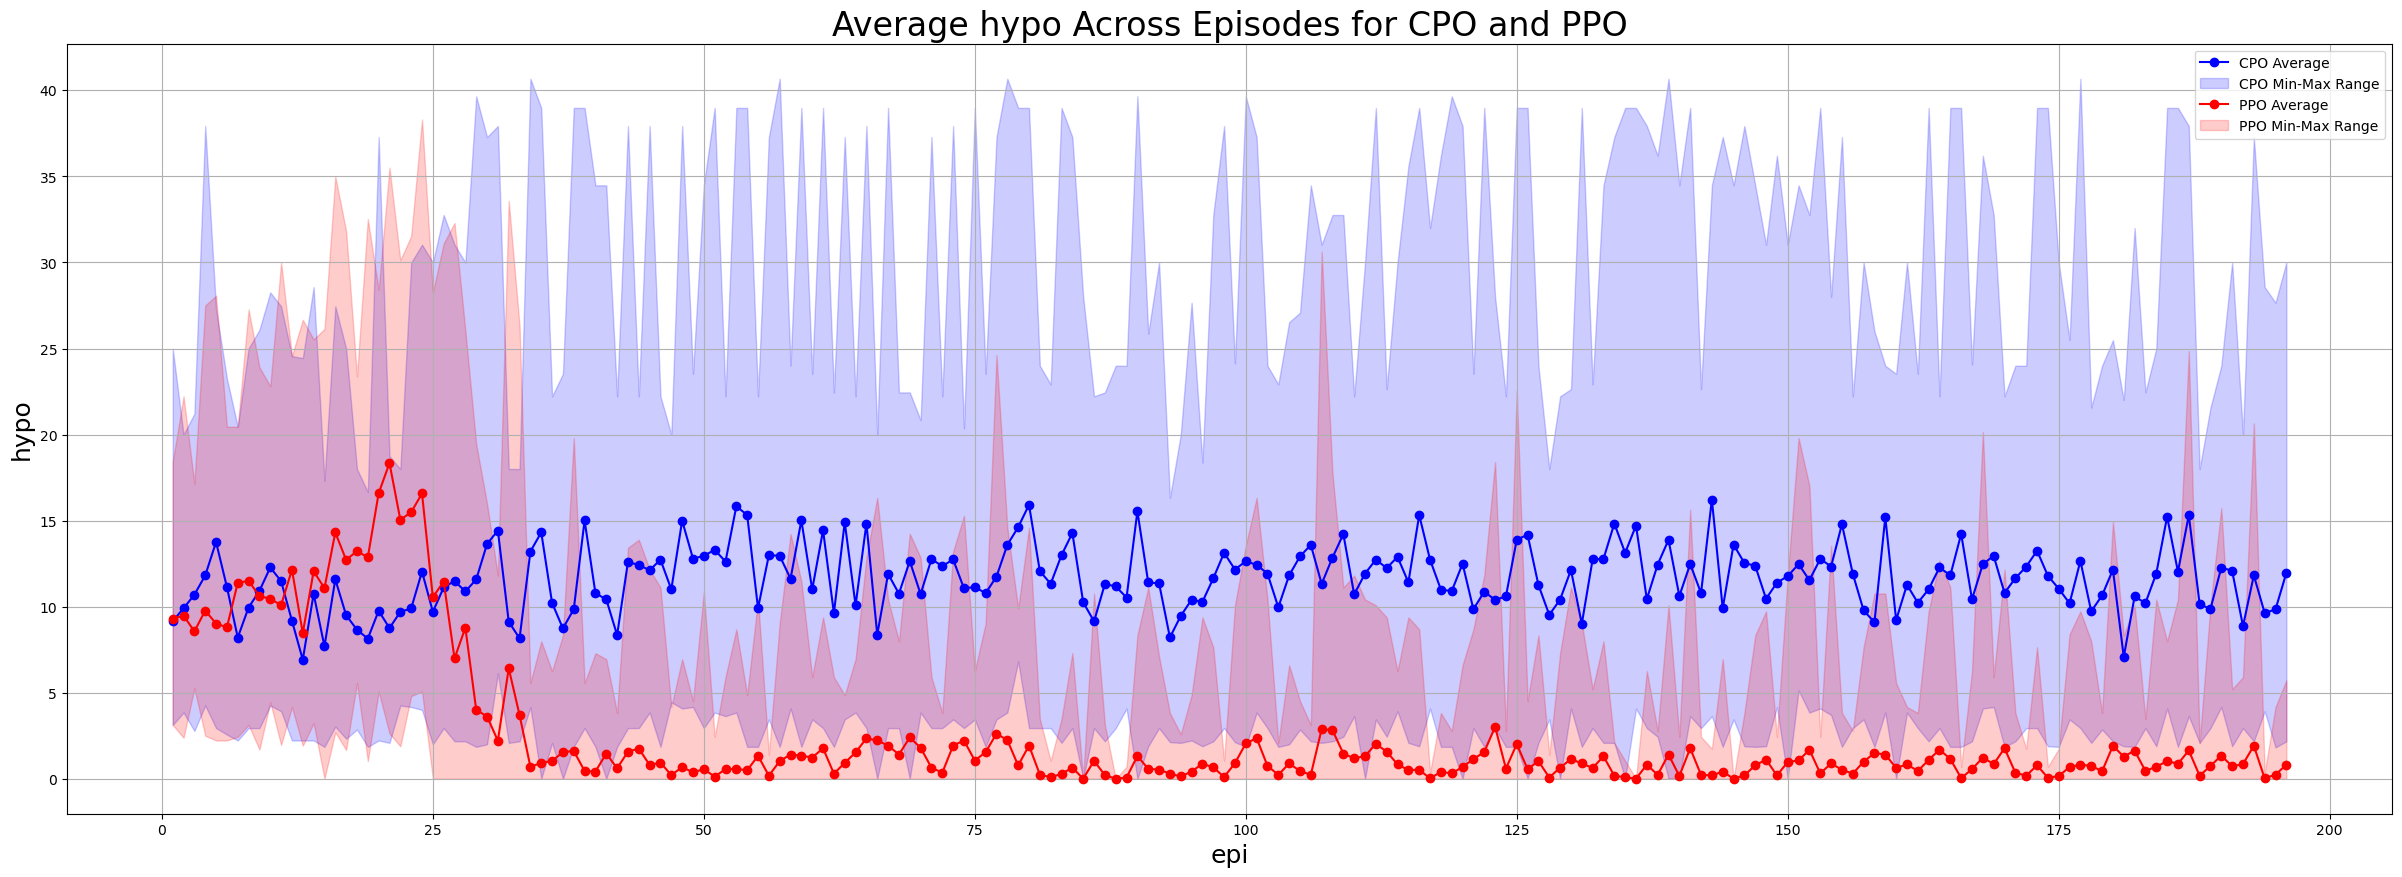

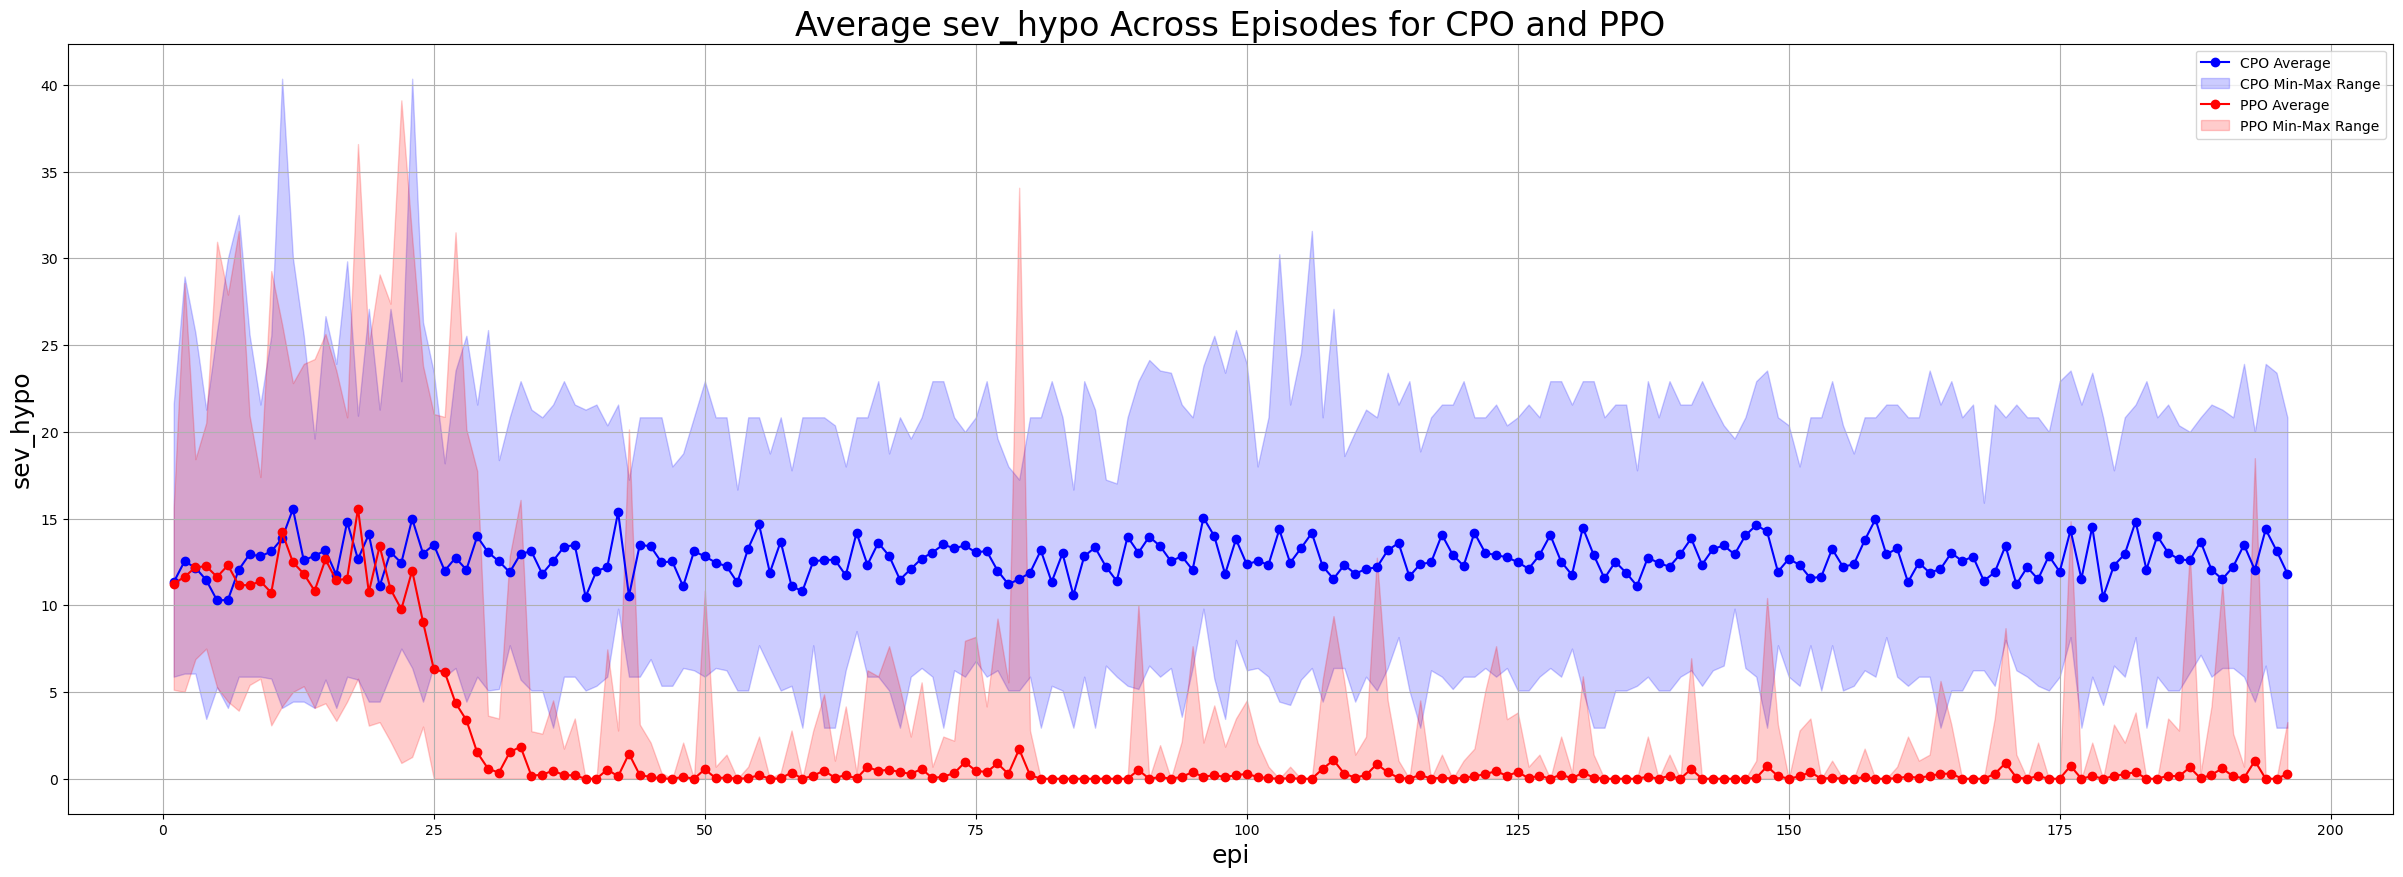

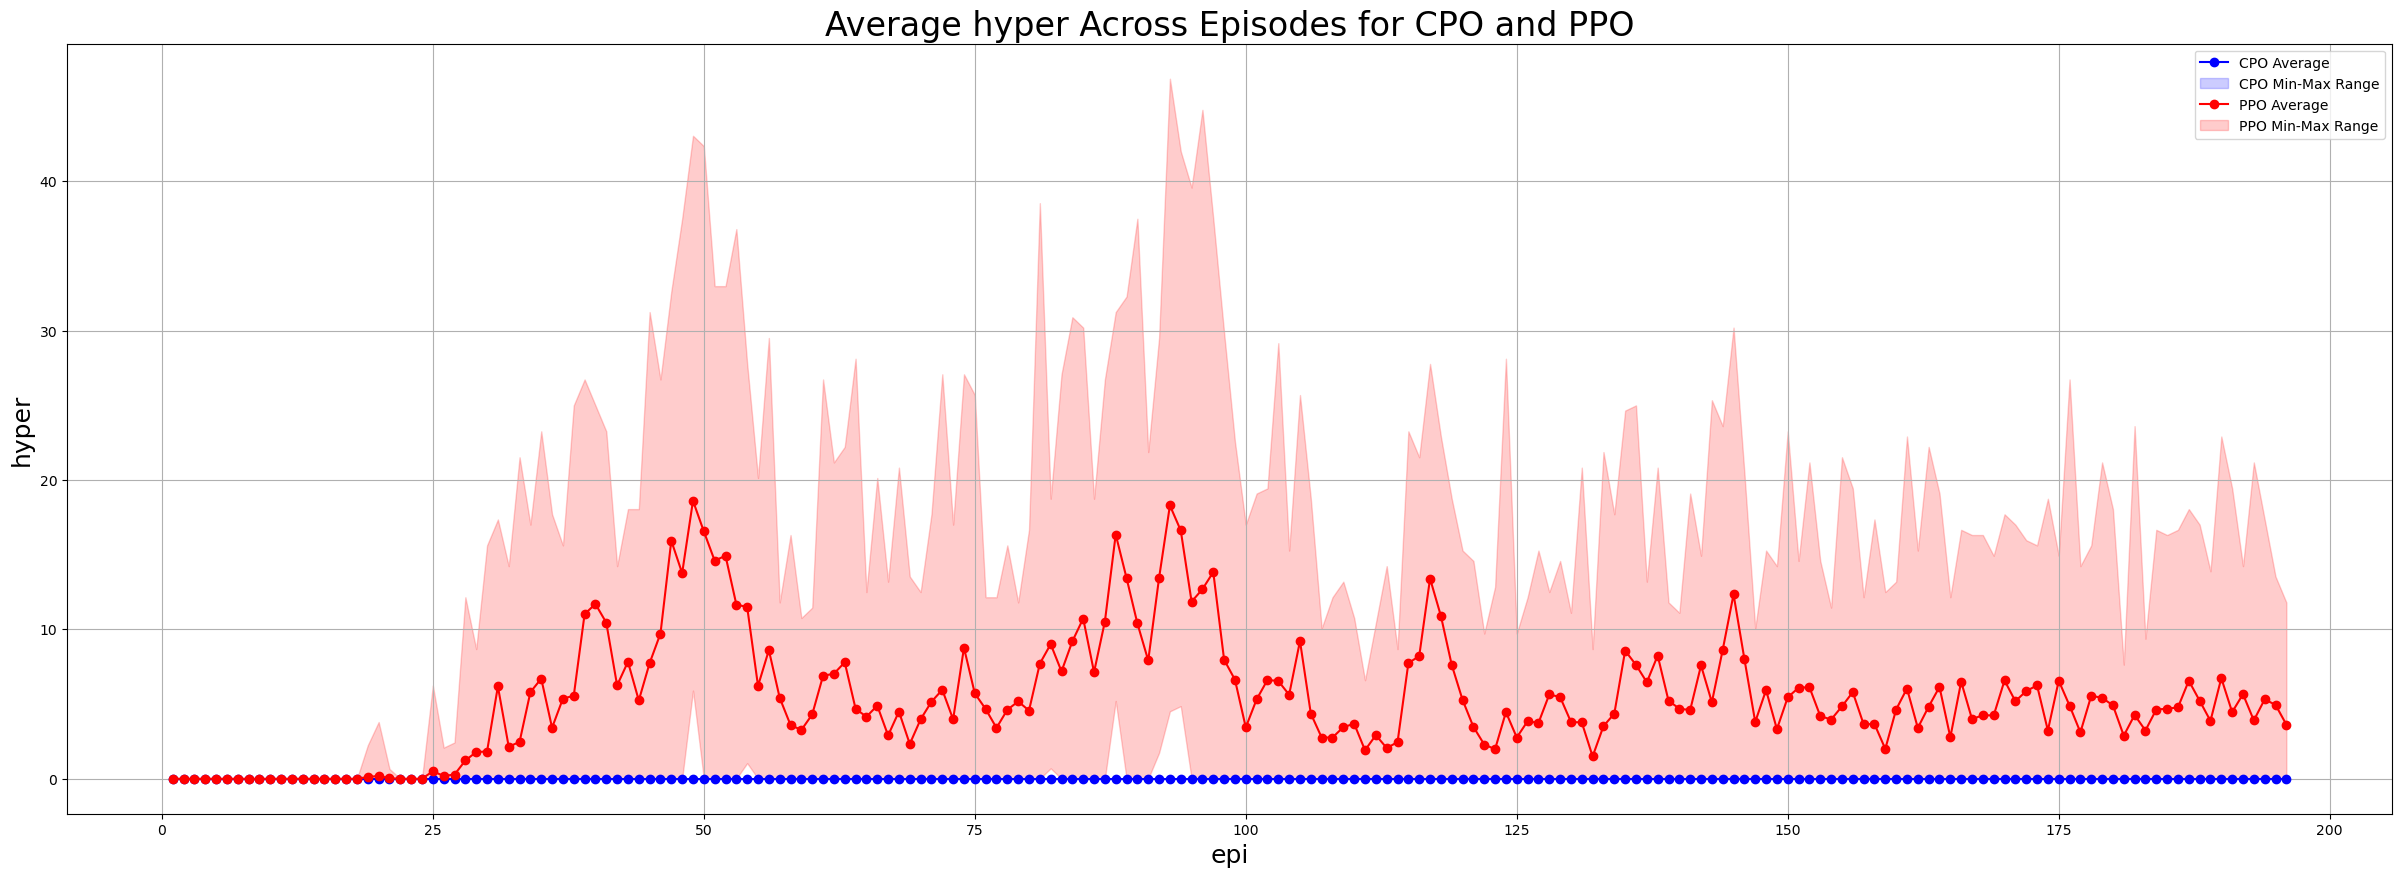

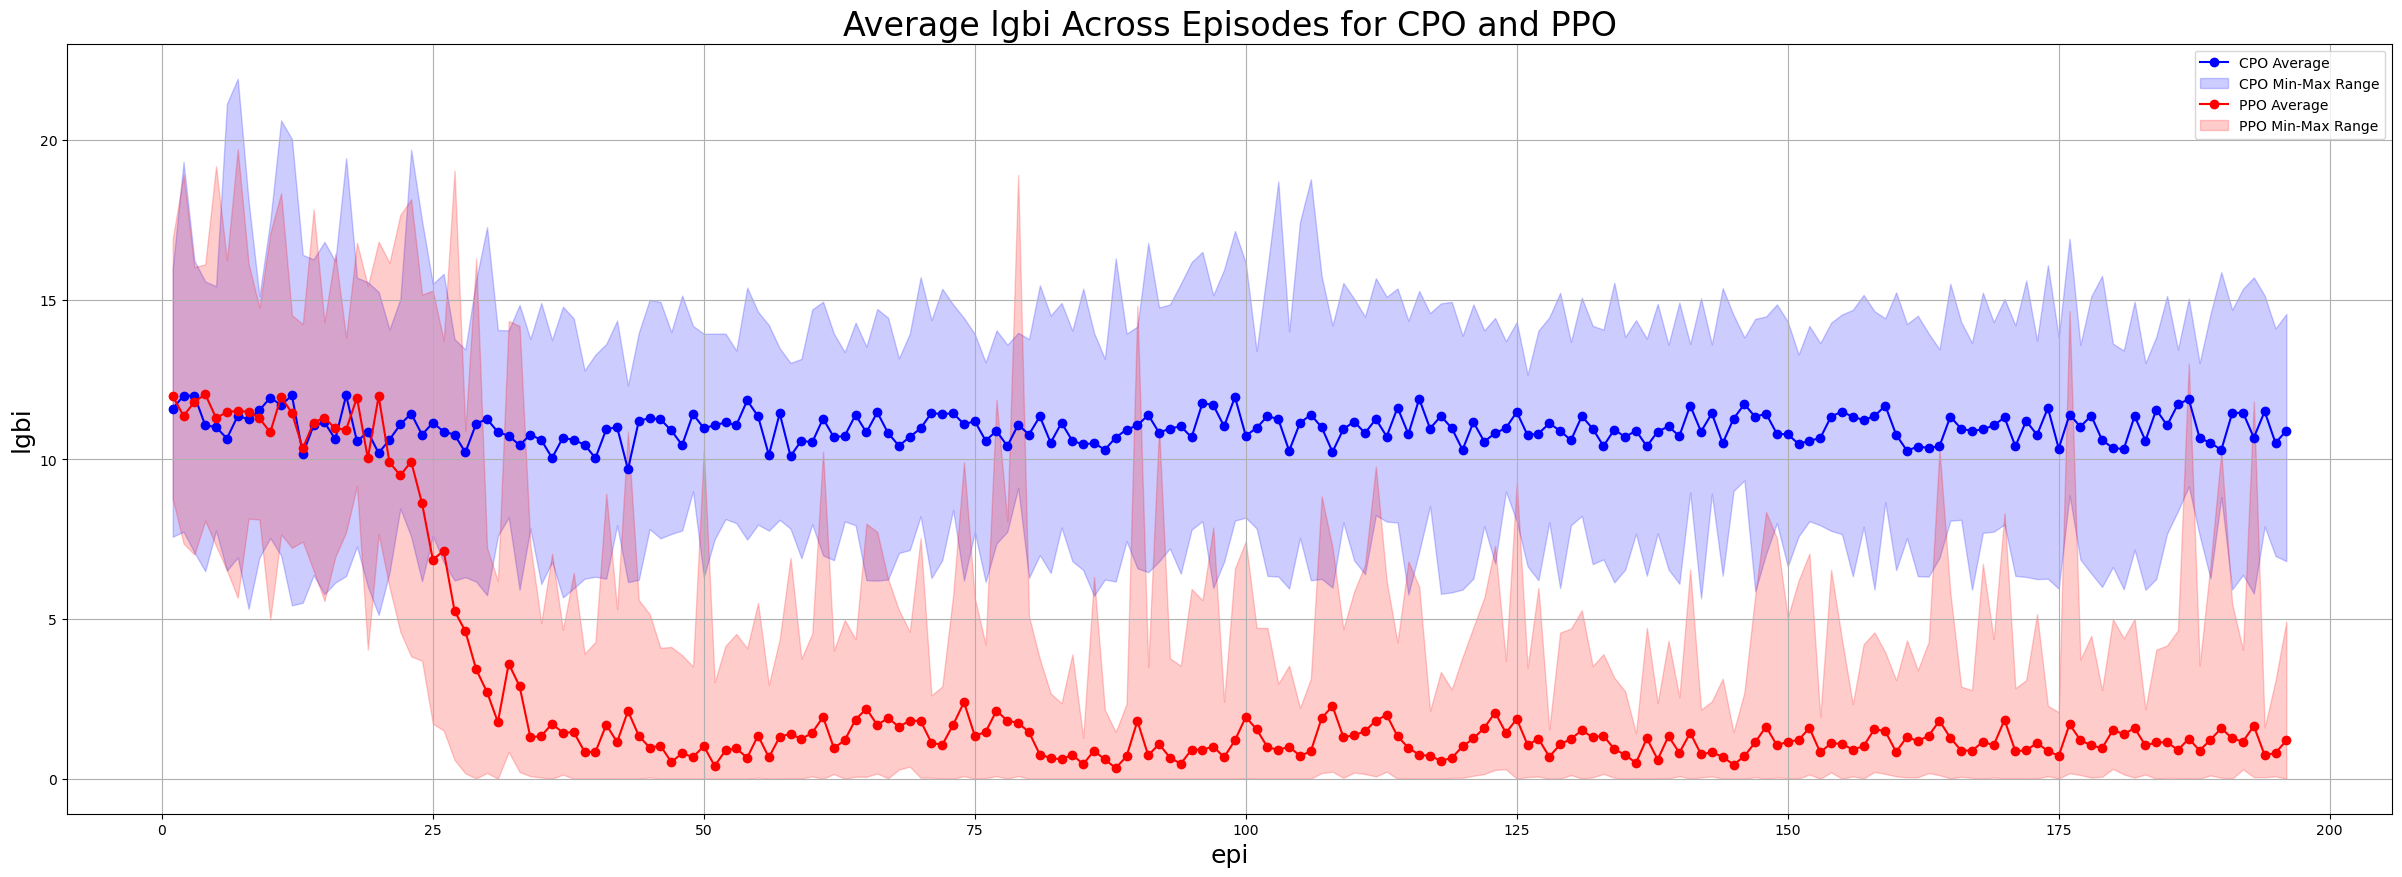

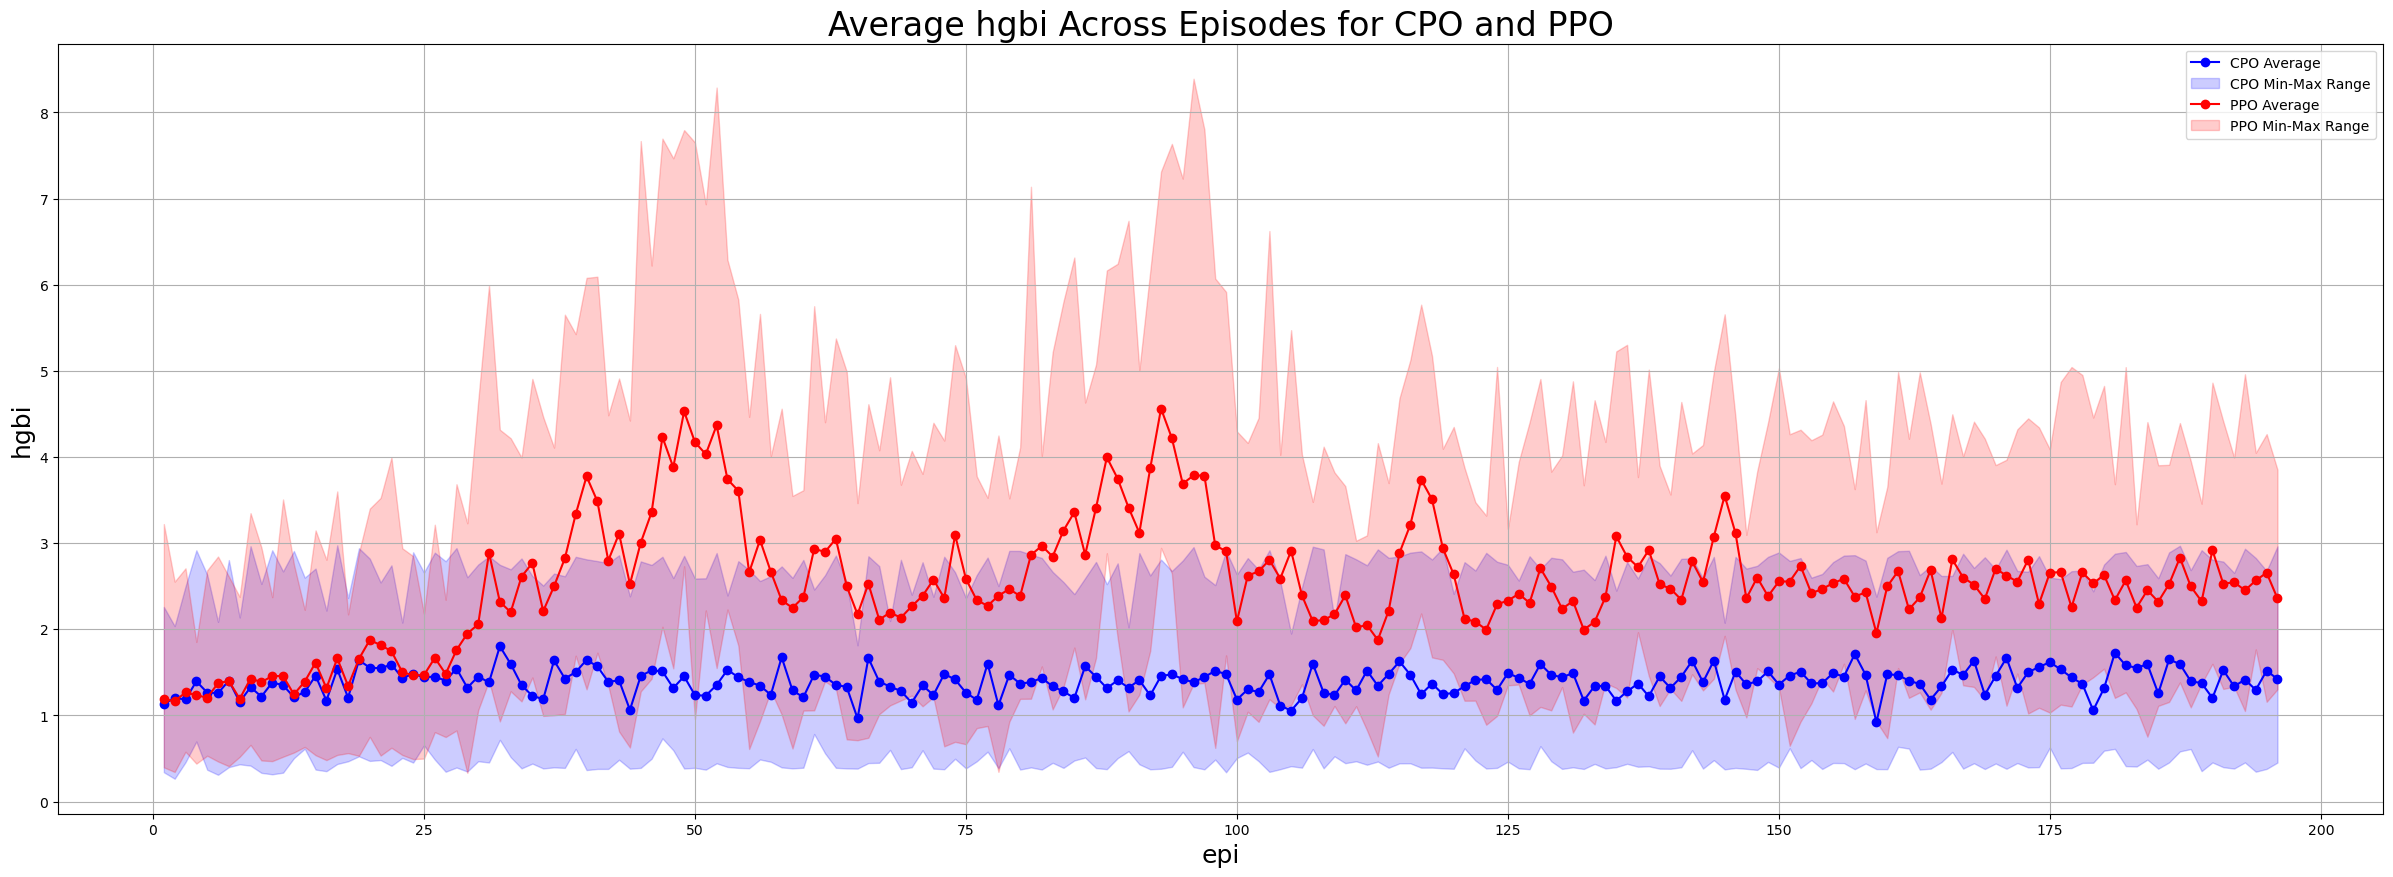

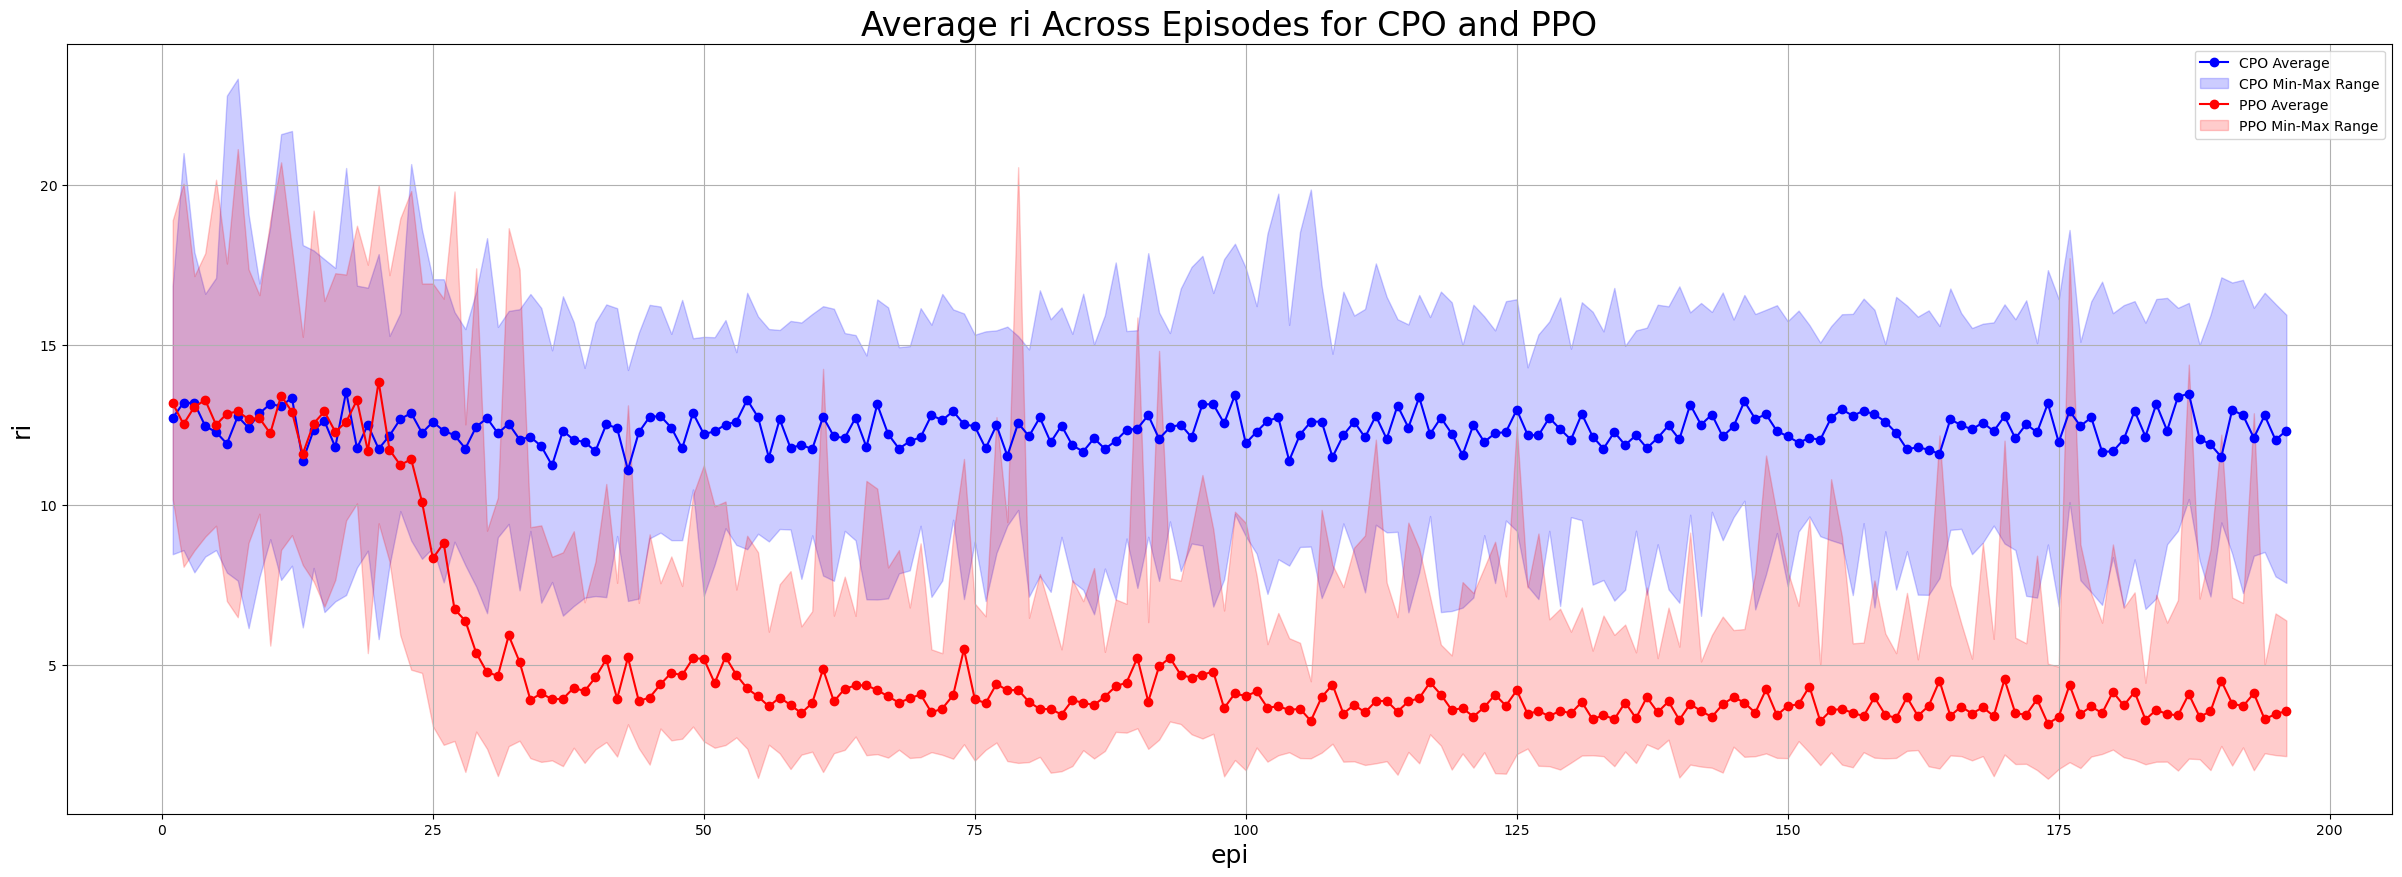

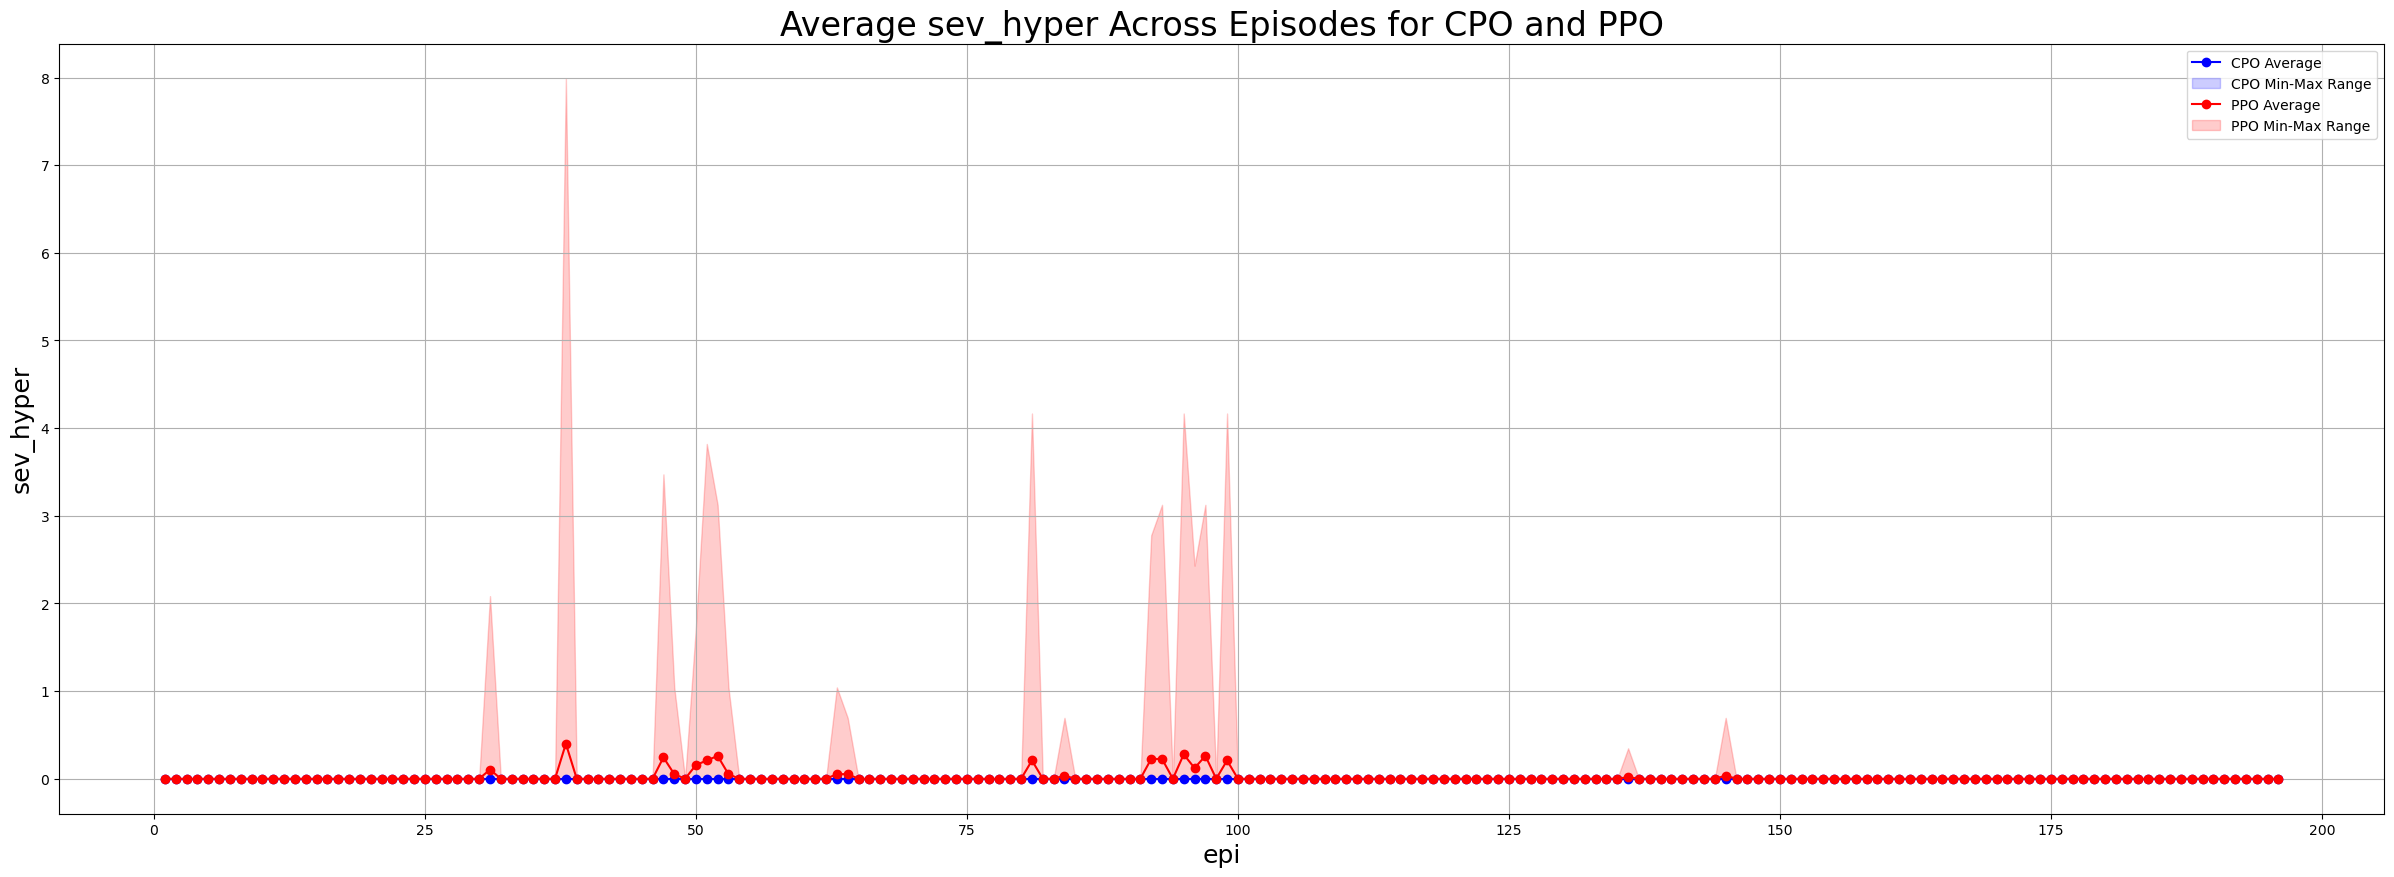

In [3]:
csv_file_path_cpo = common_path_cpo + 'testing/data/'
csv_file_path_ppo = common_path_ppo + 'testing/data/'

csv_files_cpo = glob.glob(csv_file_path_cpo + "testing_episode_summary_5*.csv")
csv_files_ppo = glob.glob(csv_file_path_ppo + "testing_episode_summary_5*.csv")

columns = [col for col in pd.read_csv(csv_files_cpo[0]).columns if col not in ['epi', 'aBGP_rmse', 'cBGP_rmse']]

generate_combined_visualizations(columns=columns, csv_files_cpo=csv_files_cpo, csv_files_ppo=csv_files_ppo)

## Validation Episode Summary

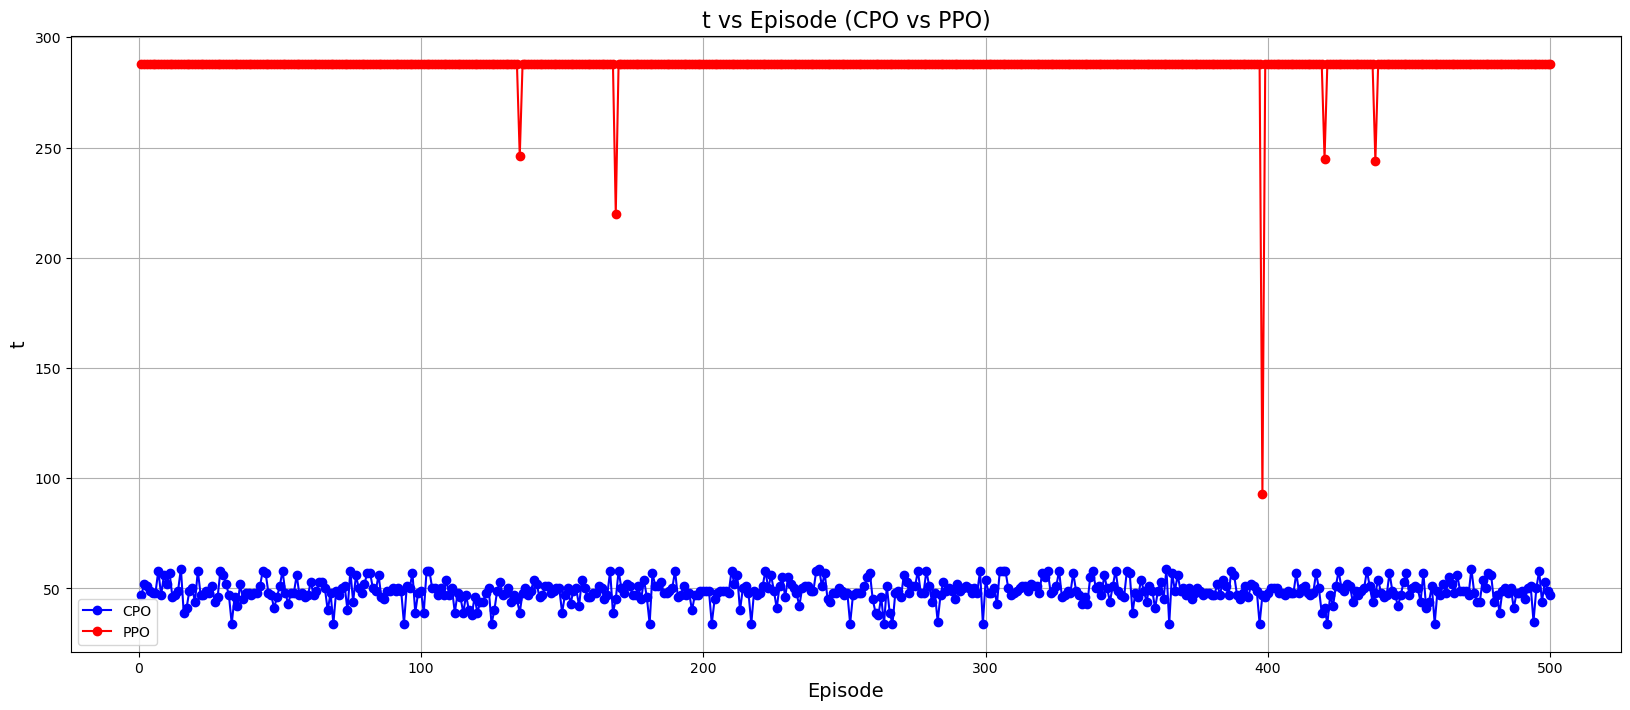

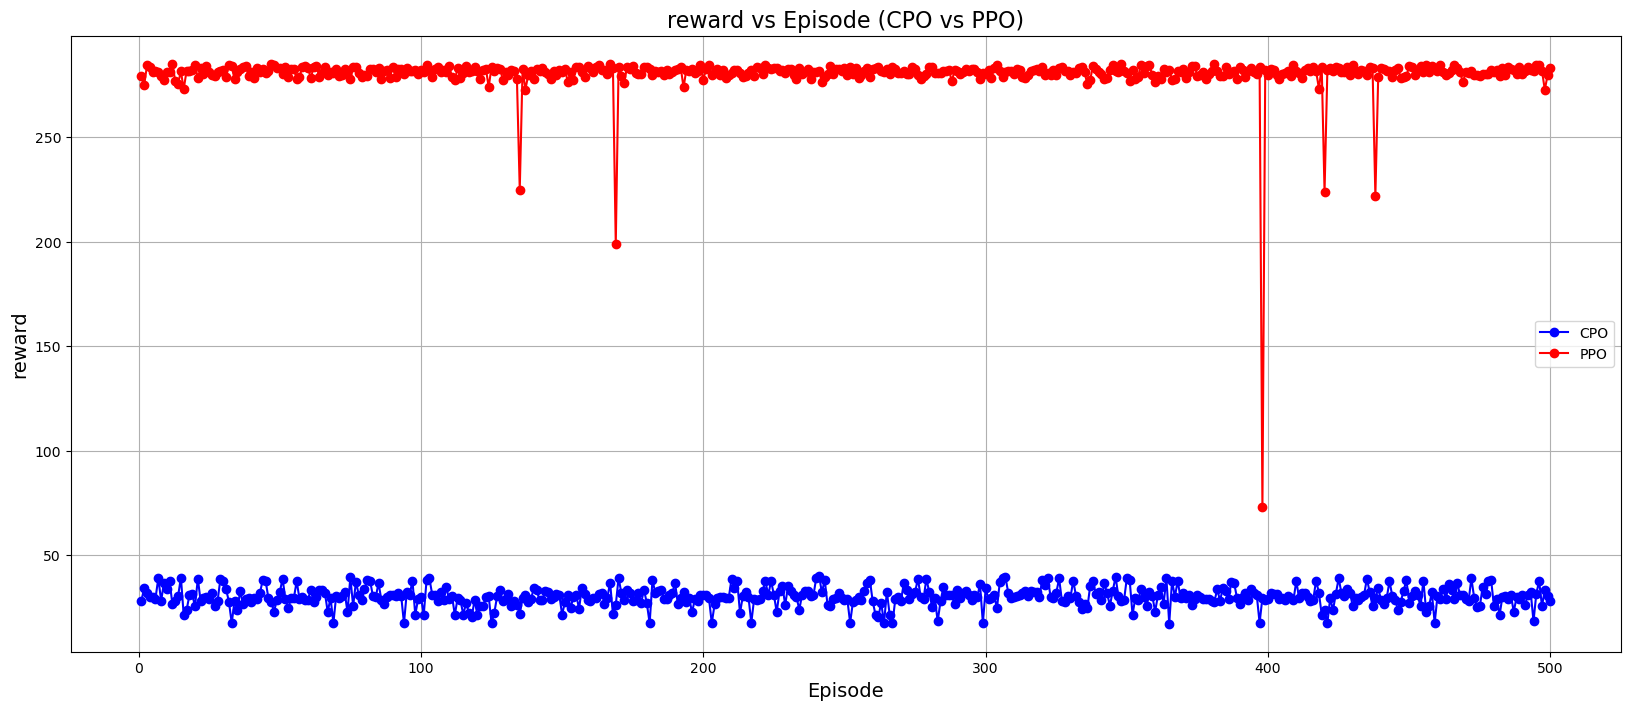

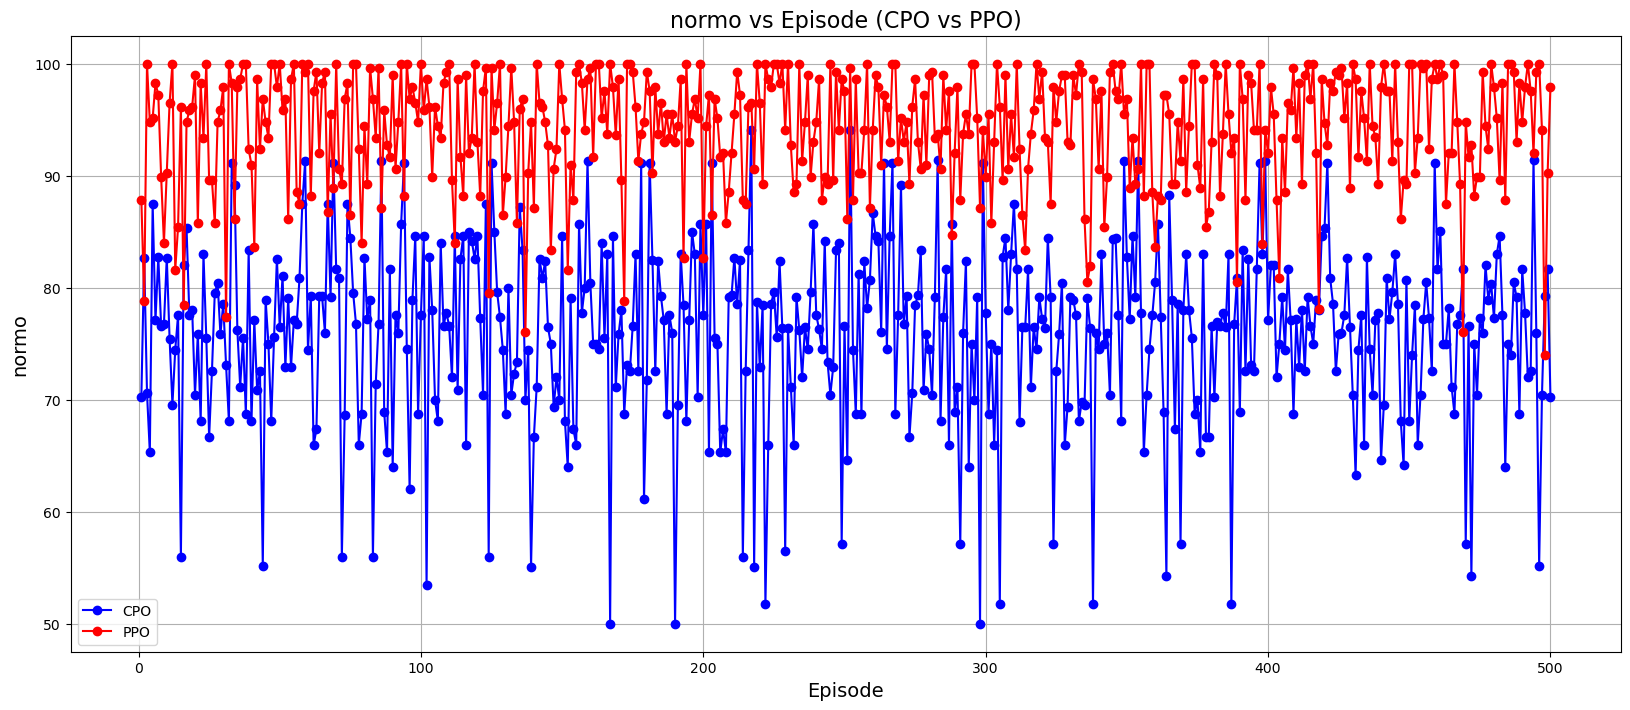

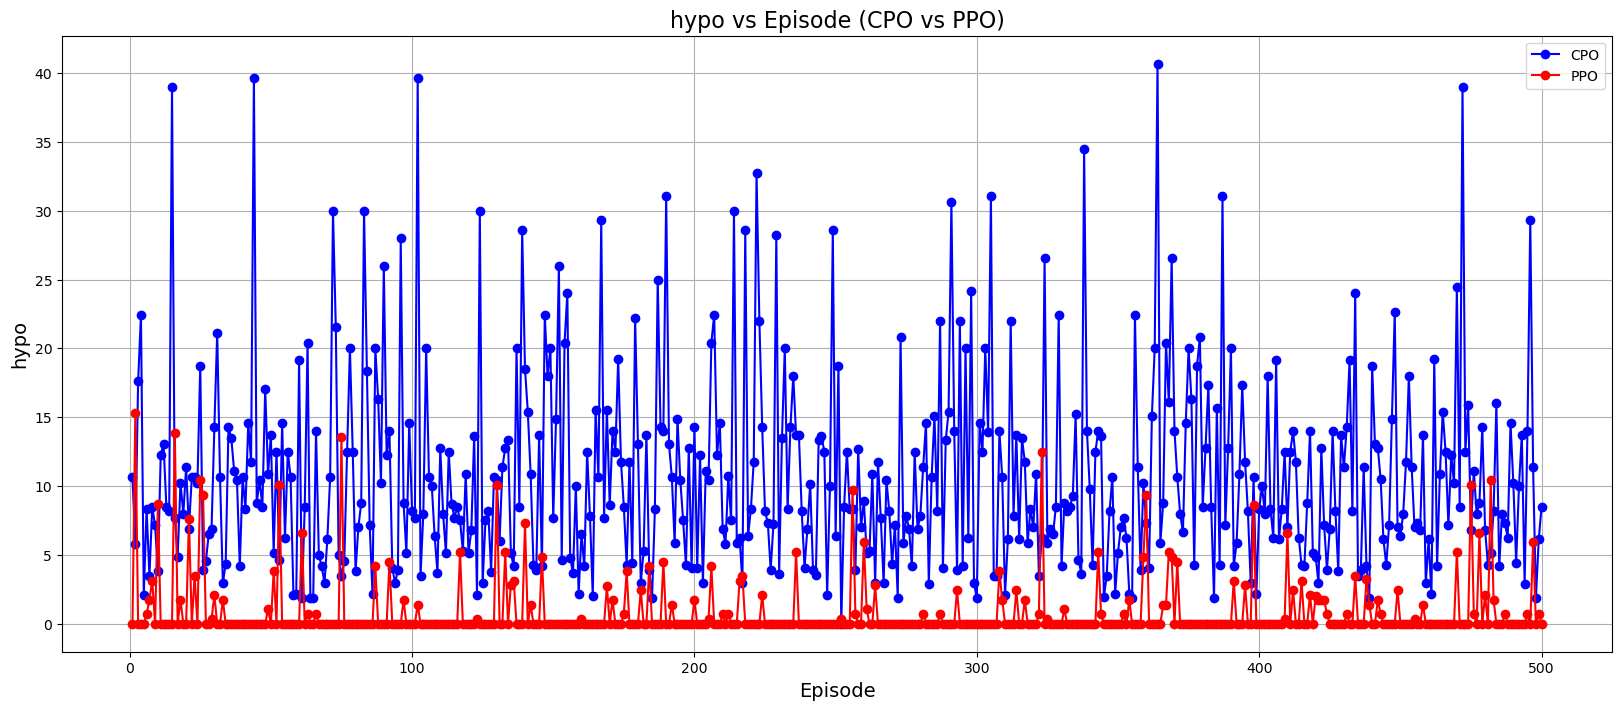

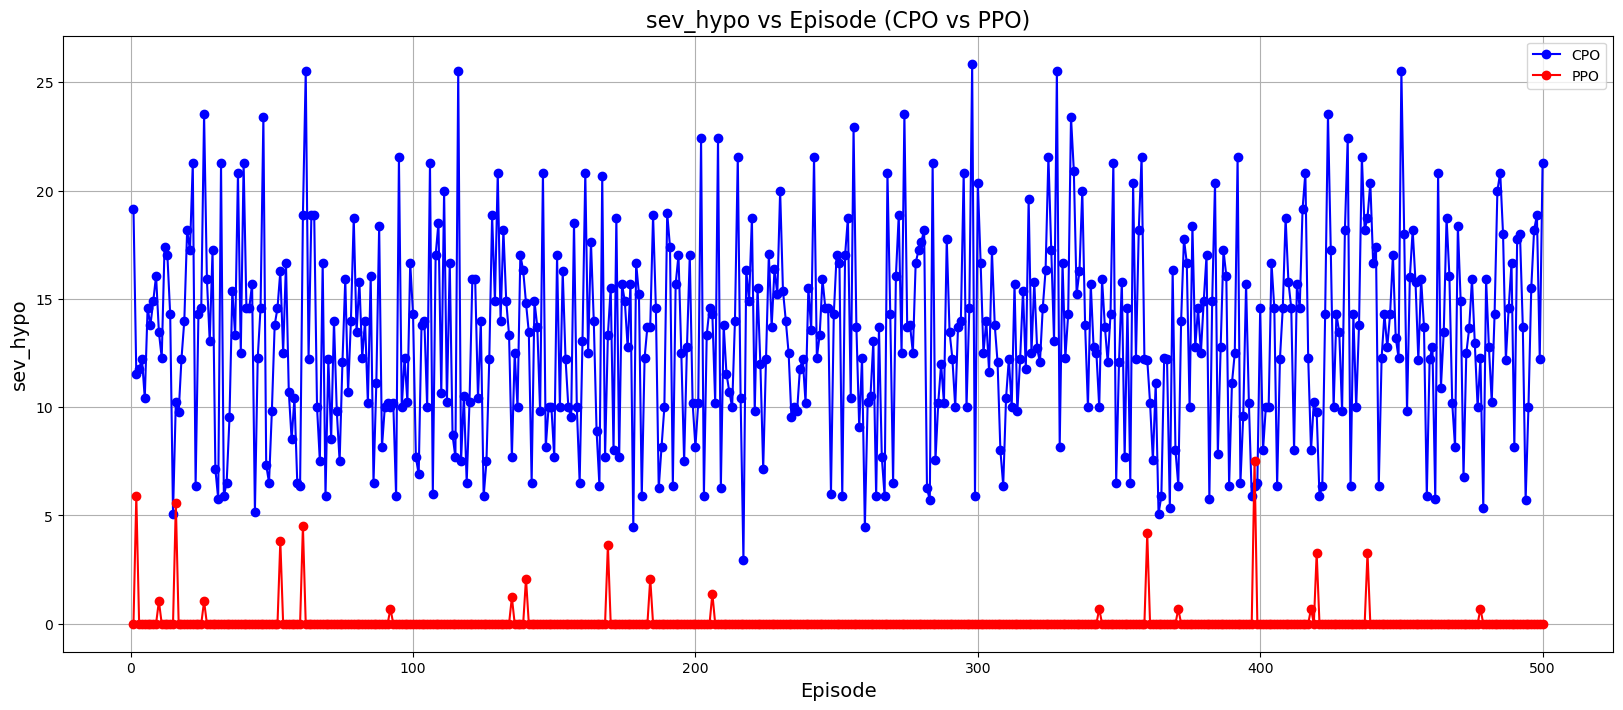

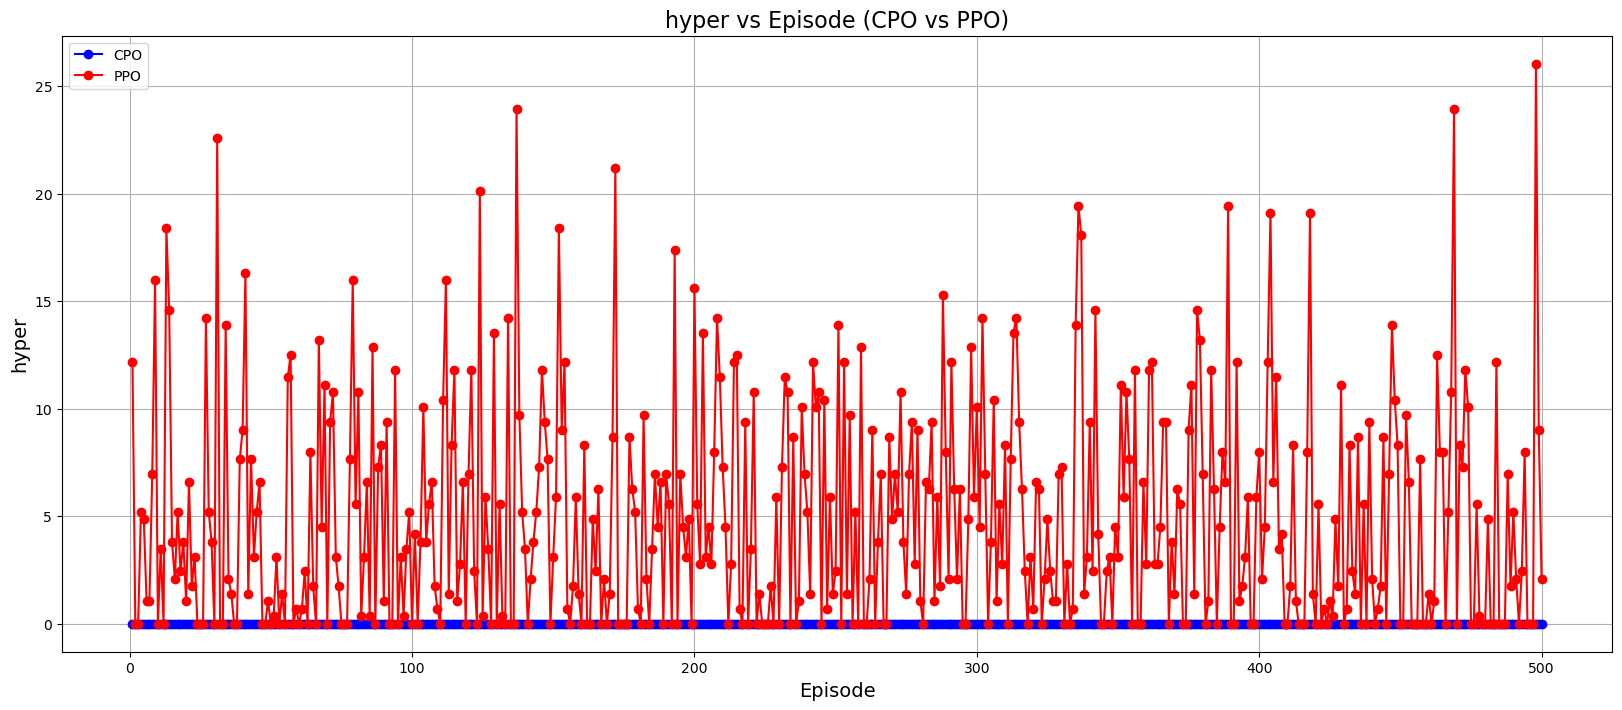

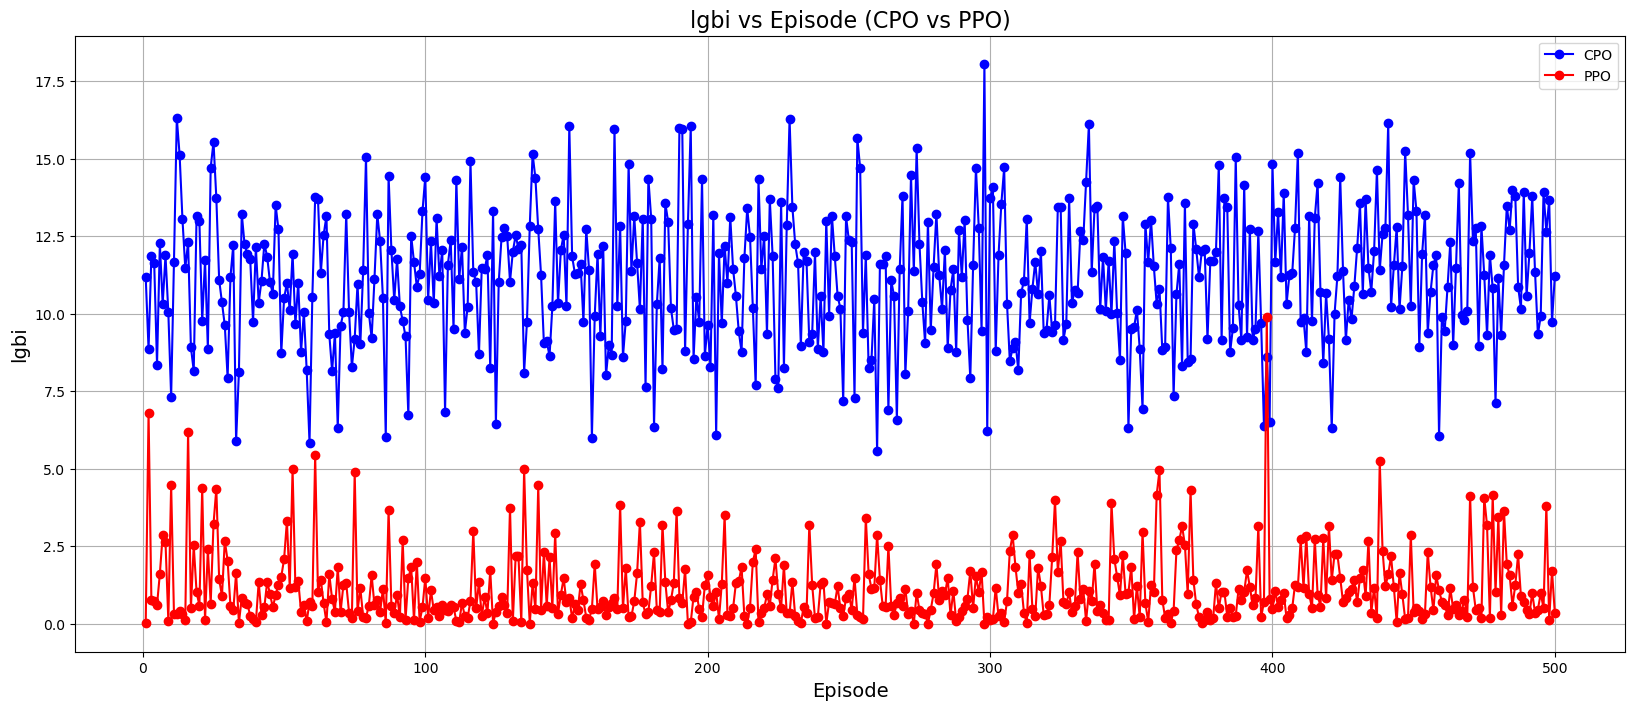

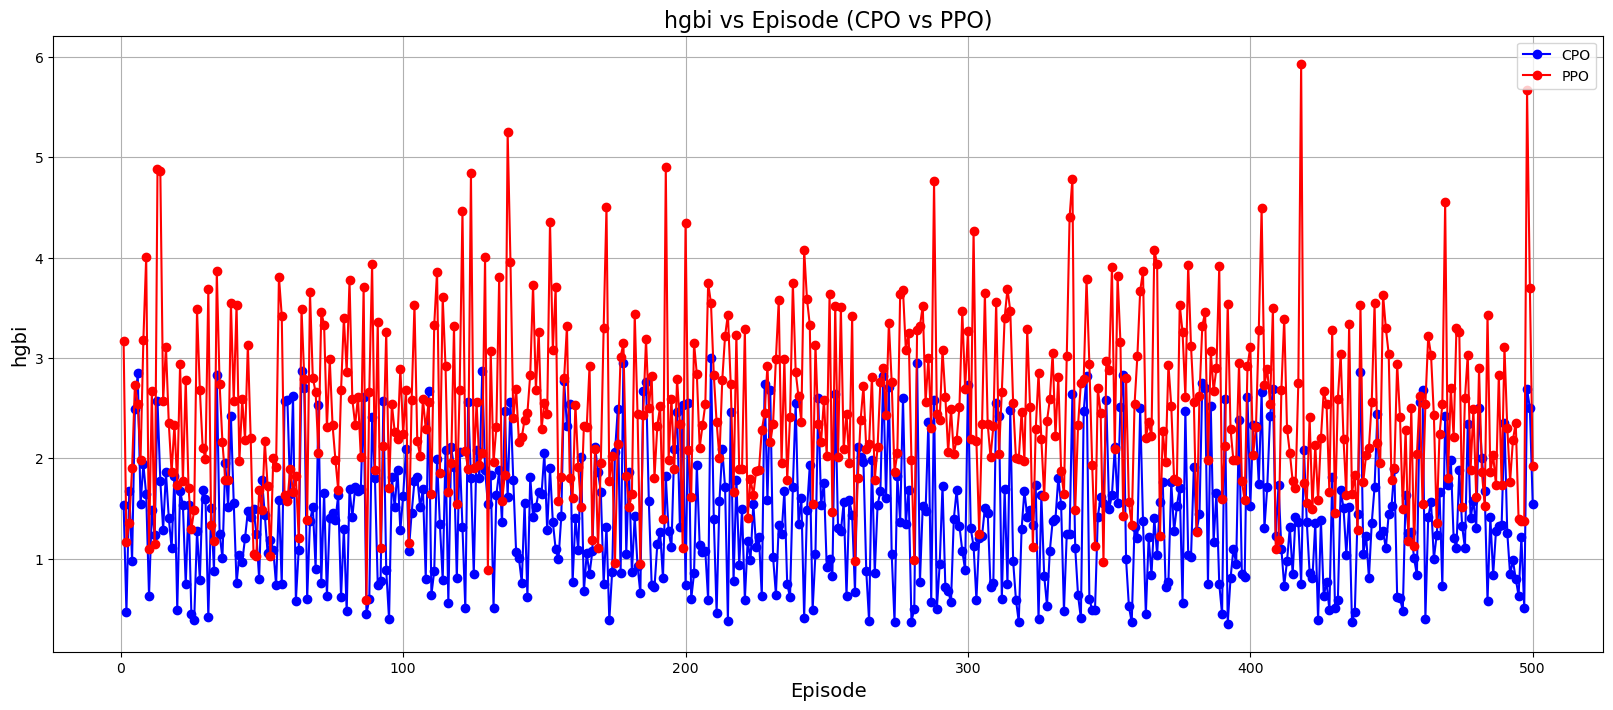

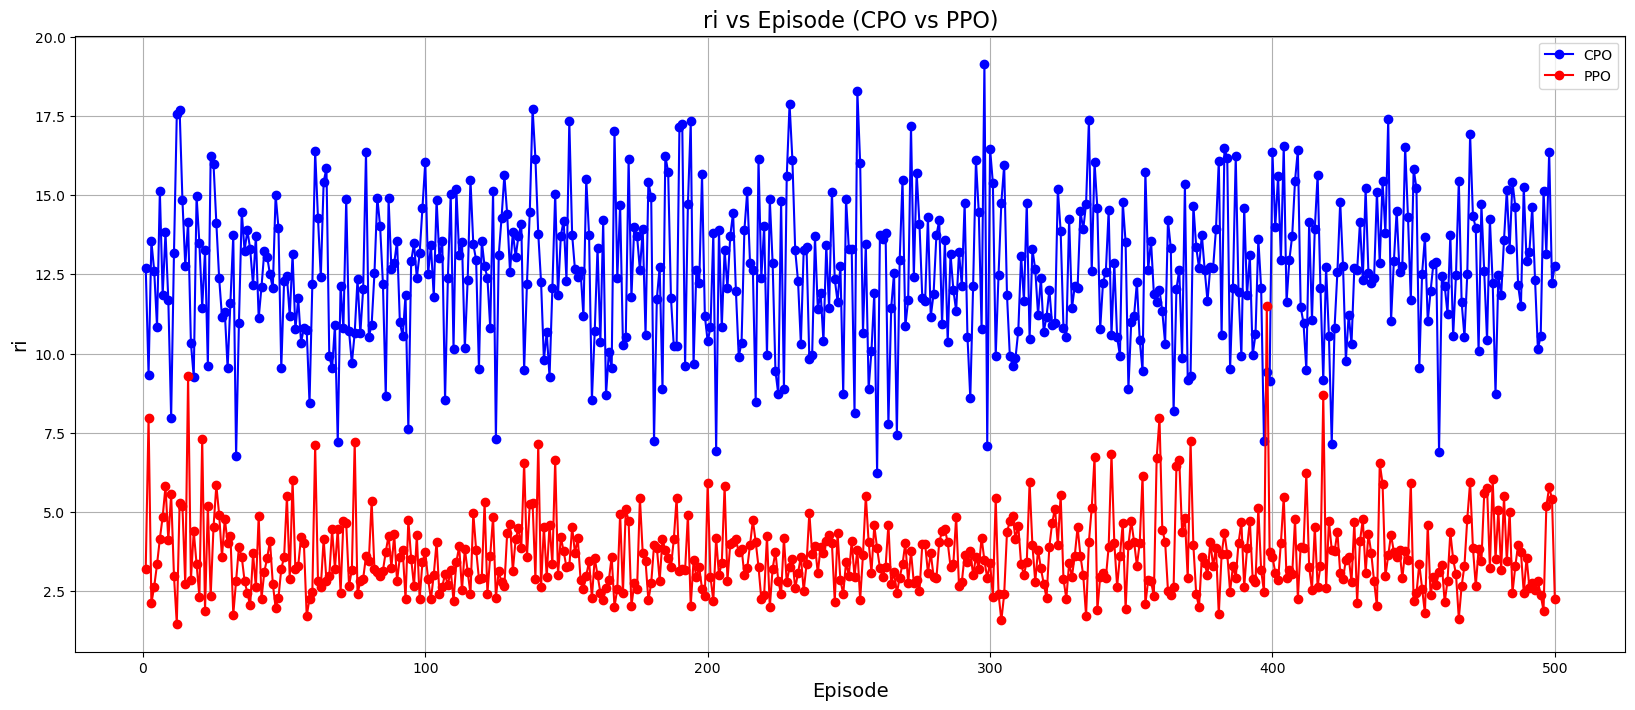

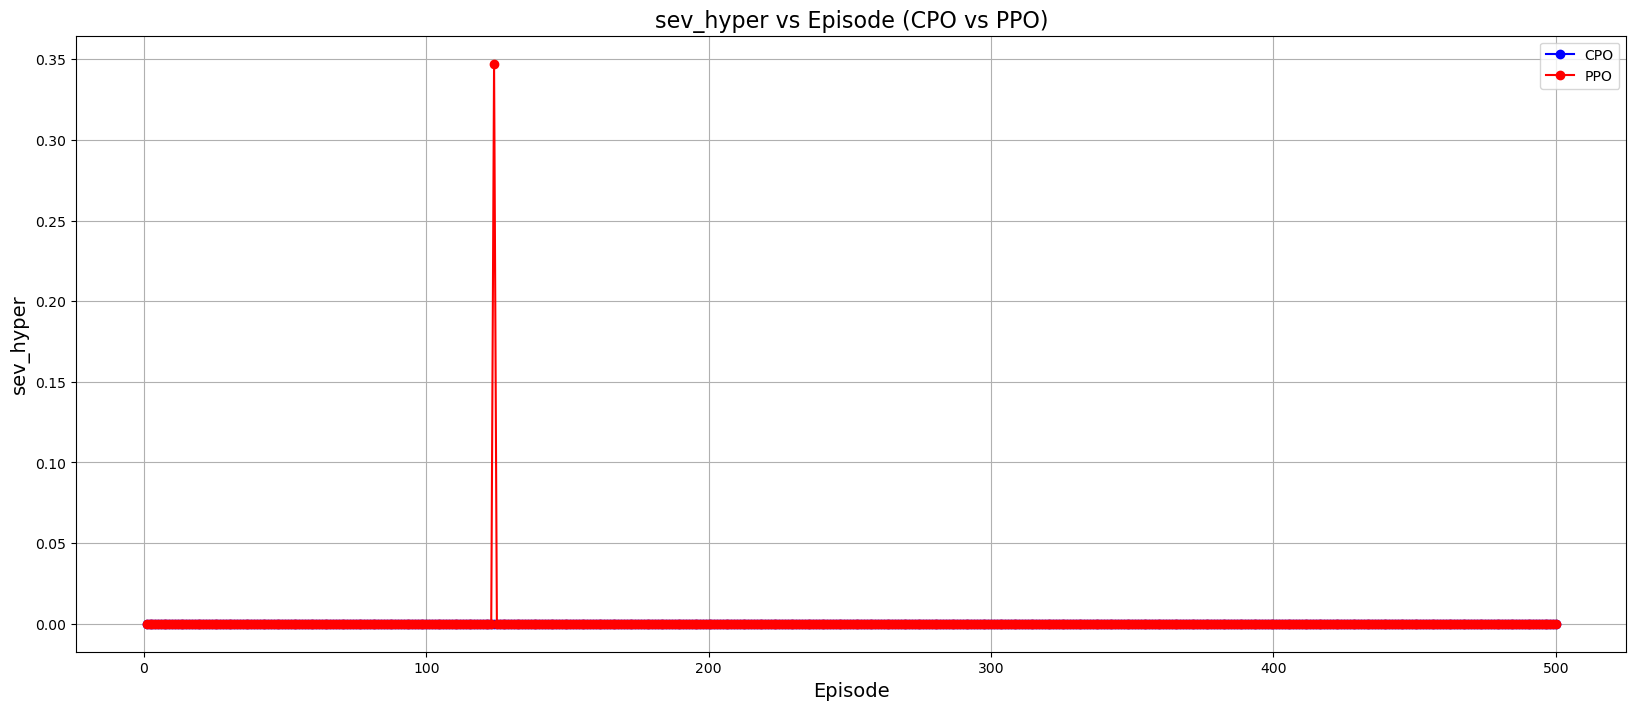

In [4]:
def combine_csv_files(csv_files):
    combined_df = pd.DataFrame()
    counter = 1

    for file in csv_files:
        df = pd.read_csv(file)
        df['epi'] = counter
        combined_df = pd.concat([combined_df, df], ignore_index=True)
        counter += 1

    return combined_df

csv_files_cpo = glob.glob(csv_file_path_cpo + "testing_episode_summary_6*.csv")
csv_files_ppo = glob.glob(csv_file_path_ppo + "testing_episode_summary_6*.csv")

combined_df_cpo = combine_csv_files(csv_files_cpo)
combined_df_ppo = combine_csv_files(csv_files_ppo)

columns = [col for col in combined_df_cpo.columns if col not in ['epi', 'aBGP_rmse', 'cBGP_rmse']]

for attribute in columns:
    plt.figure(figsize=(20, 8))
    
    plt.plot(combined_df_cpo['epi'], combined_df_cpo[attribute], marker='o', linestyle='-', color='blue', label='CPO')
    
    plt.plot(combined_df_ppo['epi'], combined_df_ppo[attribute], marker='o', linestyle='-', color='red', label='PPO')
    
    plt.title(f'{attribute} vs Episode (CPO vs PPO)', fontsize=16)
    plt.xlabel('Episode', fontsize=14)
    plt.ylabel(attribute, fontsize=14)
    plt.grid(True)
    plt.legend()
    
    plt.show()